## 초기세팅

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [114]:
import matplotlib.pyplot as plt
import matplotlib as mpl

    # 마이너스 부호 깨짐 방지
mpl.rc('axes', unicode_minus=False)

    # 나눔 고딕 폰트 설정
plt.rc('font', family='NanumGothic')

print("폰트 설정 완료")

폰트 설정 완료


In [115]:
import pandas as pd
import requests
import json
import folium

# 데이터 탐색

## 1. 데이터 준비 및 주요 컬럼 확인

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
shop = pd.read_csv('/content/drive/MyDrive/빅데이터분석(2025)/데이터/점포-상권.csv', encoding='euc-kr')
area = pd.read_csv('/content/drive/MyDrive/빅데이터분석(2025)/데이터/영역-상권.csv', encoding='euc-kr')
sales = pd.read_csv('/content/drive/MyDrive/빅데이터분석(2025)/데이터/서울시 상권분석서비스(추정매출-상권) (1).csv', encoding='euc-kr')
pop = pd.read_csv('/content/drive/MyDrive/빅데이터분석(2025)/데이터/행정동 단위 서울 생활인구(내국인).csv', encoding='euc-kr')

# 각 데이터 컬럼 확인
shop.columns, area.columns, sales.columns, pop.columns

# 상권-영역, 상권-점포 주요 키 컬럼 비교(매핑용)
area[['상권_코드', '상권_코드_명']].drop_duplicates().head()


,상권_코드,상권_코드_명
0,3110008,배화여자대학교(박노수미술관)
1,3110009,자하문터널
2,3110010,평창동서측
3,3110017,정독도서관
4,3110018,중앙고등학교


### 점포-상권 데이터 살펴보기

In [117]:
shop.head(10)

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,20241,U,관광특구,3001491,이태원 관광특구,CS100001,한식음식점,122,134,8,10,3,4,12
1,20241,U,관광특구,3001491,이태원 관광특구,CS100002,중식음식점,17,19,0,0,0,0,2
2,20241,U,관광특구,3001491,이태원 관광특구,CS100003,일식음식점,24,25,0,0,0,0,1
3,20241,U,관광특구,3001491,이태원 관광특구,CS100004,양식음식점,221,226,2,5,2,5,5
4,20241,U,관광특구,3001491,이태원 관광특구,CS100005,제과점,25,30,0,0,0,0,5
5,20241,U,관광특구,3001491,이태원 관광특구,CS100006,패스트푸드점,21,26,12,3,12,3,5
6,20241,U,관광특구,3001491,이태원 관광특구,CS100007,치킨전문점,7,8,0,0,13,1,1
7,20241,U,관광특구,3001491,이태원 관광특구,CS100008,분식전문점,14,17,6,1,6,1,3
8,20241,U,관광특구,3001491,이태원 관광특구,CS100009,호프-간이주점,160,165,2,3,2,4,5
9,20241,U,관광특구,3001491,이태원 관광특구,CS100010,커피-음료,97,121,5,6,3,3,24


In [118]:
shop[['상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명']].drop_duplicates().head()


,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명
0,3001491,이태원 관광특구,CS100001,한식음식점
1,3001491,이태원 관광특구,CS100002,중식음식점
2,3001491,이태원 관광특구,CS100003,일식음식점
3,3001491,이태원 관광특구,CS100004,양식음식점
4,3001491,이태원 관광특구,CS100005,제과점


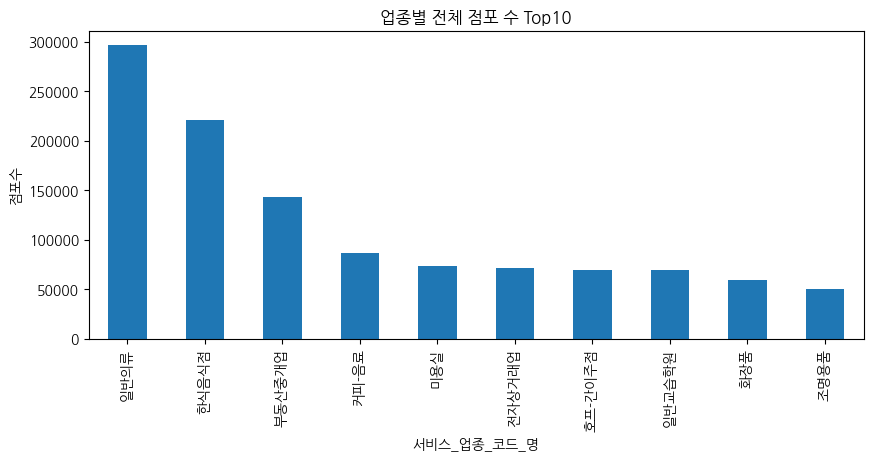

In [119]:
shop.groupby('서비스_업종_코드_명')['점포_수'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,4))
plt.title("업종별 전체 점포 수 Top10")
plt.ylabel("점포수")
plt.show()


In [120]:
shop_cols = ['상권_코드', '상권_코드_명', '서비스_업종_코드_명', '점포_수', '유사_업종_점포_수', '폐업_점포_수', '폐업_률', '프랜차이즈_점포_수']
shop[shop_cols].head(5)

,상권_코드,상권_코드_명,서비스_업종_코드_명,점포_수,유사_업종_점포_수,폐업_점포_수,폐업_률,프랜차이즈_점포_수
0,3001491,이태원 관광특구,한식음식점,122,134,4,3,12
1,3001491,이태원 관광특구,중식음식점,17,19,0,0,2
2,3001491,이태원 관광특구,일식음식점,24,25,0,0,1
3,3001491,이태원 관광특구,양식음식점,221,226,5,2,5
4,3001491,이태원 관광특구,제과점,25,30,0,0,5


### 상권-영역 데이터

In [121]:
area.head(10)

,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,자치구_코드,자치구_코드_명,행정동_코드,행정동_코드_명,영역_면적
0,A,골목상권,3110008,배화여자대학교(박노수미술관),197093,453418,11110,종로구,11110515,청운효자동,149264
1,A,골목상권,3110009,자하문터널,196991,455057,11110,종로구,11110550,부암동,178306
2,A,골목상권,3110010,평창동서측,197064,456643,11110,종로구,11110560,평창동,369415
3,A,골목상권,3110017,정독도서관,198581,453781,11110,종로구,11110600,가회동,83855
4,A,골목상권,3110018,중앙고등학교,198883,453690,11110,종로구,11110600,가회동,166872
5,A,골목상권,3110019,창덕궁,199222,452926,11110,종로구,11110615,종로1?2?3?4가동,40999
6,A,골목상권,3110020,서울국제고등학교,199598,454302,11110,종로구,11110650,혜화동,133692
7,A,골목상권,3110001,이북5도청사,196262,456660,11110,종로구,11110560,평창동,108529
8,A,골목상권,3110002,독립문역 1번,196220,452912,11110,종로구,11110570,무악동,31531
9,A,골목상권,3110003,세검정초등학교,196389,455998,11110,종로구,11110550,부암동,191570


In [122]:
coords = area[['상권_코드', '상권_코드_명', '엑스좌표_값', '와이좌표_값']].drop_duplicates()
coords.head()

,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값
0,3110008,배화여자대학교(박노수미술관),197093,453418
1,3110009,자하문터널,196991,455057
2,3110010,평창동서측,197064,456643
3,3110017,정독도서관,198581,453781
4,3110018,중앙고등학교,198883,453690


In [123]:
sales[['상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명', '당월_매출_금액']].drop_duplicates().head()

,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액
0,3110001,이북5도청사,CS100001,한식음식점,385150643
1,3110001,이북5도청사,CS100009,호프-간이주점,11026440
2,3110001,이북5도청사,CS200001,일반교습학원,52047765
3,3110002,독립문역 1번,CS100001,한식음식점,582522265
4,3110002,독립문역 1번,CS100005,제과점,446525280


### 인구밀도 데이터

In [124]:
pop.head(10)

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20250610,0,11110515,14324.6367,567.4955,361.6096,509.8299,354.8873,346.6973,367.3414,...,406.7116,474.2493,597.0343,695.0119,774.6674,671.0734,590.5196,492.6495,357.3970,1042.1793
1,20250610,0,11110530,11412.0977,263.5438,117.1307,207.4970,229.6798,377.3521,401.0833,...,362.2796,447.0304,542.9375,608.1411,633.7152,514.8062,434.2288,403.5861,255.0653,839.1582
2,20250610,0,11110540,3965.2222,79.2122,60.6953,500.6406,342.4131,114.1928,69.5809,...,111.2141,101.2189,142.2233,161.3514,138.5412,162.0050,114.9965,116.5326,106.9394,307.5082
3,20250610,0,11110550,12444.3786,383.7867,297.5831,362.5638,306.0129,345.9687,258.0298,...,374.9239,408.1159,474.2774,587.1777,617.6140,533.1140,575.7622,467.2213,377.2789,953.7262
4,20250610,0,11110560,19748.9866,691.6294,500.2776,552.6294,760.8033,432.9867,405.3880,...,432.3087,489.3872,706.5613,727.3211,946.5767,886.0553,1006.3807,912.4507,603.3421,1831.5568
5,20250610,0,11110570,6252.8726,172.3363,110.2147,192.4031,185.3076,153.5715,175.5142,...,171.6287,173.5151,210.8954,271.1437,295.6004,275.7197,254.6526,268.9295,197.3182,444.2467
6,20250610,0,11110580,7521.5418,293.4922,116.7520,174.6720,197.5601,197.0924,223.2293,...,246.3749,298.5496,312.6780,343.7127,365.0358,304.9024,301.3743,216.2148,177.7094,534.9293
7,20250610,0,11110600,3433.3622,61.2503,43.2354,107.3665,42.6124,85.1032,113.5990,...,83.6650,94.9267,138.7265,152.6586,177.0476,196.4247,182.9855,126.4799,68.5944,286.9063
8,20250610,0,11110615,23902.3045,233.4200,73.5432,233.7497,925.3507,1413.3414,1416.0919,...,1235.8919,873.3111,931.2744,804.5304,881.7530,763.6566,680.8255,583.5620,432.6125,1179.9685
9,20250610,0,11110630,8139.4101,33.9193,25.8191,341.0885,335.0204,391.7579,314.2907,...,380.5420,308.5064,368.4213,230.7113,234.6315,311.0914,300.2446,305.1734,196.4210,463.1627


In [125]:
pop[['행정동코드', '총생활인구수']].head()

,행정동코드,총생활인구수
0,11110515,14324.6367
1,11110530,11412.0977
2,11110540,3965.2222
3,11110550,12444.3786
4,11110560,19748.9866


## 2. 데이터 병합 및 파생변수 생성 (생존율 등)

In [126]:
# 상권-점포 + 상권-영역 병합(좌표, 행정동코드)
df = pd.merge(shop, area[['상권_코드', '상권_코드_명', '행정동_코드', '행정동_코드_명']],
              on=['상권_코드', '상권_코드_명'], how='left')
df[['상권_코드_명', '행정동_코드_명']].head()

# 매출 병합
df = pd.merge(df, sales[['상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명', '당월_매출_금액']],
              on=['상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명'], how='left')
df[['상권_코드_명', '서비스_업종_코드_명', '당월_매출_금액']].head()

# 행정동-인구 평균값 집계, 병합
pop_avg = pop.groupby('행정동코드')['총생활인구수'].mean().reset_index().rename(columns={'총생활인구수':'평균유동인구'})
df = pd.merge(df, pop_avg, left_on='행정동_코드', right_on='행정동코드', how='left')
df = df.drop('행정동코드', axis=1)
df[['상권_코드_명', '행정동_코드_명', '평균유동인구']].head()

# 생존율(%) 파생
if '폐업_률' in df.columns:
    df['생존율(%)'] = 100 - df['폐업_률']
else:
    df['생존율(%)'] = None

# [최종 병합 데이터 예시]
df.head()


,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,행정동_코드,행정동_코드_명,당월_매출_금액,평균유동인구,생존율(%)
0,20241,U,관광특구,3001491,이태원 관광특구,CS100001,한식음식점,122,134,8,10,3,4,12,11170650,이태원1동,1.185751e+10,11660.410198,97
1,20241,U,관광특구,3001491,이태원 관광특구,CS100001,한식음식점,122,134,8,10,3,4,12,11170650,이태원1동,1.312908e+10,11660.410198,97
2,20241,U,관광특구,3001491,이태원 관광특구,CS100001,한식음식점,122,134,8,10,3,4,12,11170650,이태원1동,1.276885e+10,11660.410198,97
3,20241,U,관광특구,3001491,이태원 관광특구,CS100001,한식음식점,122,134,8,10,3,4,12,11170650,이태원1동,1.432346e+10,11660.410198,97
4,20241,U,관광특구,3001491,이태원 관광특구,CS100001,한식음식점,122,134,8,10,3,4,12,11170650,이태원1동,1.216901e+10,11660.410198,97


## 3. 상권별 인구/매출/점포수 집계 및 대학가/상업지구/베드타운 후보 추출 과정

In [190]:
# 상권별 평균 집계 (상권_코드_명 기준)
area_group = df.groupby('상권_코드_명').agg({
    '점포_수': 'mean',
    '당월_매출_금액': 'mean',
    '평균유동인구': 'mean'
}).reset_index()
area_group = area_group.sort_values('평균유동인구', ascending=False)
area_group.head(10)  # 인구 상위 상권 확인

,상권_코드_명,점포_수,당월_매출_금액,평균유동인구
1,63빌딩,5.290514,2.368735e+09,97163.050067
1145,여의도역(여의도),40.398350,4.297847e+09,97163.050067
222,국회의사당역(국회의사당),19.551444,2.208734e+09,97163.050067
106,경복아파트교차로,6.790584,9.747475e+08,97100.315119
1142,언주역 8번,2.504587,5.365235e+07,97100.315119
654,뱅뱅사거리,28.537008,1.708163e+09,97100.315119
207,구역삼세무서,14.605217,7.118093e+08,97100.315119
1147,역삼역 4번,3.003774,7.250497e+07,97100.315119
213,국기원,2.875912,1.171632e+09,97100.315119
495,르네상스호텔사거리,10.656085,6.235942e+08,97100.315119


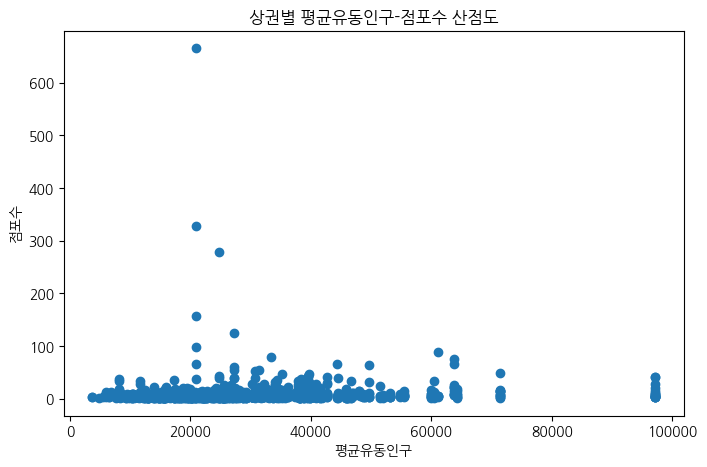

In [191]:
# 산점도: 인구 vs 점포수
plt.figure(figsize=(8,5))
plt.scatter(area_group['평균유동인구'], area_group['점포_수'])
plt.xlabel('평균유동인구'); plt.ylabel('점포수')
plt.title('상권별 평균유동인구-점포수 산점도')
plt.show()

### 대학가 선정

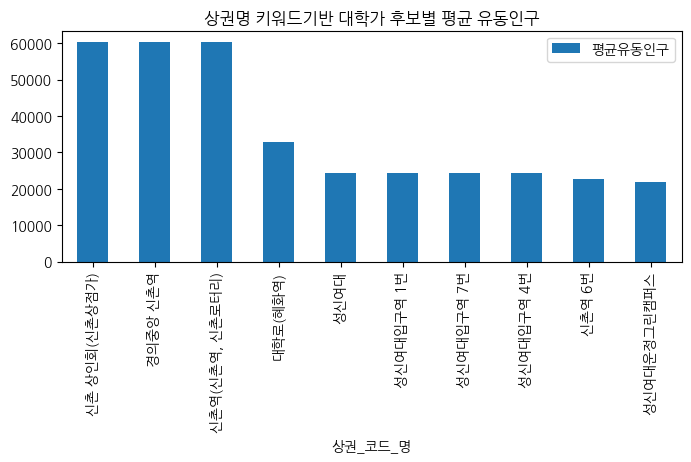

In [192]:
# 컬럼이 없다면 상권명에 키워드 포함된 상권명을 자동 추출
keyword = ['성신여대', '대학로', '신촌']
campus_mask = df['상권_코드_명'].apply(lambda x: any(k in str(x) for k in keyword))
campus_df = df[campus_mask].groupby('상권_코드_명').agg({'평균유동인구':'mean', '점포_수':'mean'}).sort_values('평균유동인구', ascending=False)
#campus_areas = campus_df.head(3).index.tolist()
campus_df
campus_df.plot(y='평균유동인구', kind='bar', figsize=(8,3), title="상권명 키워드기반 대학가 후보별 평균 유동인구")
plt.show()


In [193]:
campus_areas = ['신촌역(신촌역, 신촌로터리)', '성신여대', '대학로(혜화역)']

### 상업지구

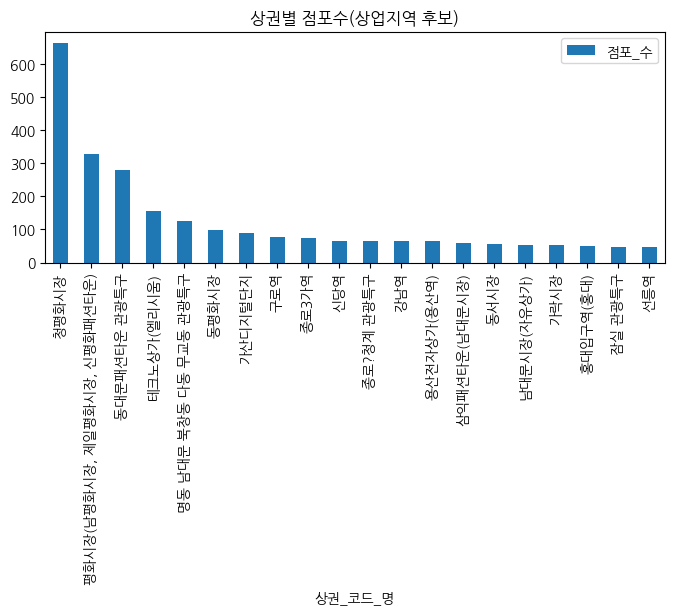

['청평화시장', '구로역', '용산전자상가(용산역)']

In [130]:
# 점포수와 매출액 상위 3개(대학가 제외)
commercial_df = area_group[~area_group['상권_코드_명'].isin(campus_areas)]
commercial_df = commercial_df.sort_values(['점포_수','당월_매출_금액'], ascending=False)
desired_indices = [0, 7, 12]
commercial_areas = commercial_df.iloc[desired_indices]['상권_코드_명'].tolist()
commercial_df.head(20)
commercial_df.head(20).plot(x='상권_코드_명', y='점포_수', kind='bar', figsize=(8,3), title="상권별 점포수(상업지역 후보)")
plt.show()

commercial_areas


### 베드타운 선정

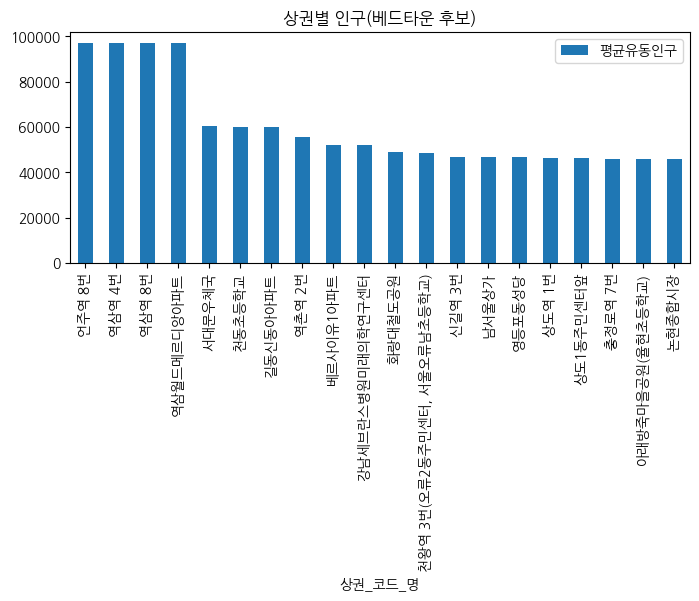

['언주역 8번', '서대문우체국', '길동신동아아파트']

In [131]:
# 점포수·매출 모두 하위 30% (상기 6곳 제외) + 인구 많은 곳
floating_cut = area_group['점포_수'].quantile(0.3)
sales_cut = area_group['당월_매출_금액'].quantile(0.3)
bedtown_df = area_group[
    (area_group['점포_수'] < floating_cut) &
    (area_group['당월_매출_금액'] < sales_cut) &
    (~area_group['상권_코드_명'].isin(campus_areas + commercial_areas))
]
bedtown_df = bedtown_df.sort_values('평균유동인구', ascending=False)
desired_indices = [0, 4, 6]
bedtown_areas = bedtown_df.iloc[desired_indices]['상권_코드_명'].tolist()
bedtown_df.head(20)
bedtown_df.head(20).plot(x='상권_코드_명', y='평균유동인구', kind='bar', figsize=(8,3), title="상권별 인구(베드타운 후보)")
plt.show()

bedtown_areas


## 9개 상권 각 3업종 선정, 표와 바차트로 보여주기

In [132]:
selected_areas = campus_areas + commercial_areas + bedtown_areas
selected_areas

['신촌역(신촌역, 신촌로터리)',
 '성신여대',
 '대학로(혜화역)',
 '청평화시장',
 '구로역',
 '용산전자상가(용산역)',
 '언주역 8번',
 '서대문우체국',
 '길동신동아아파트']

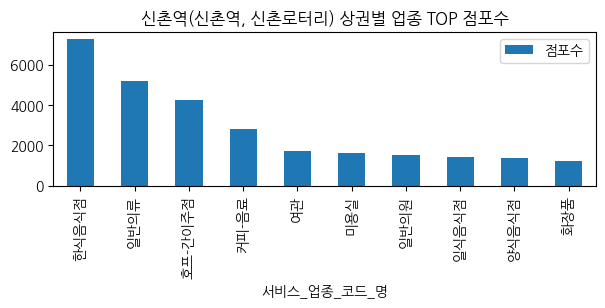

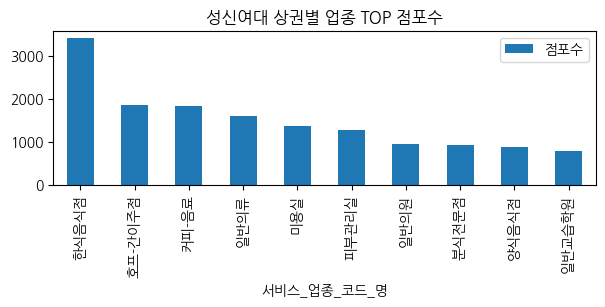

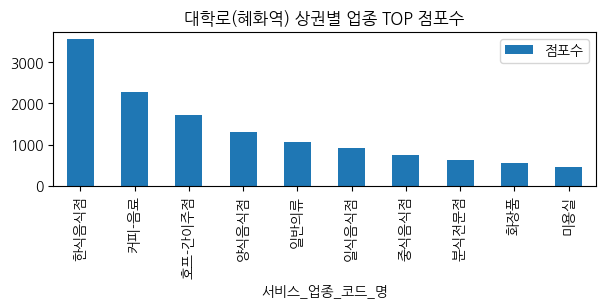

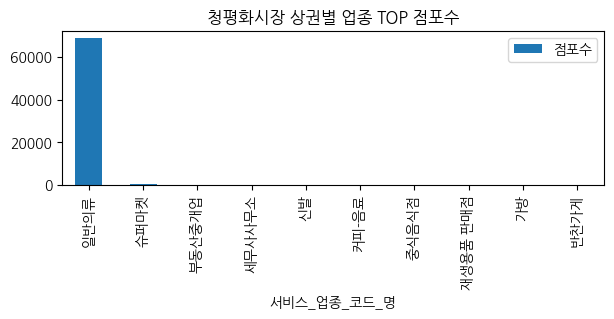

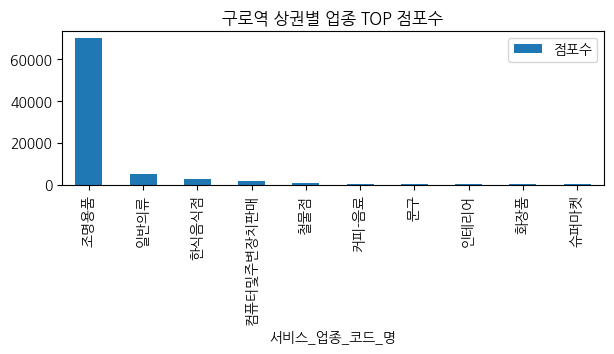

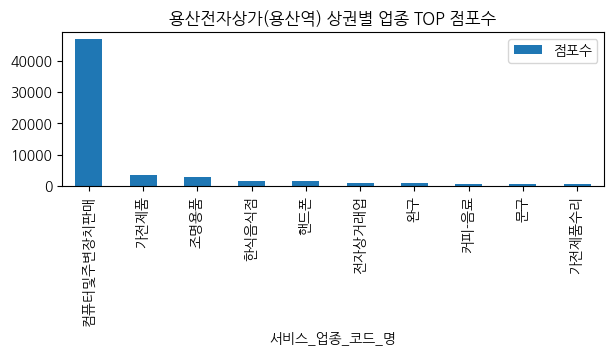

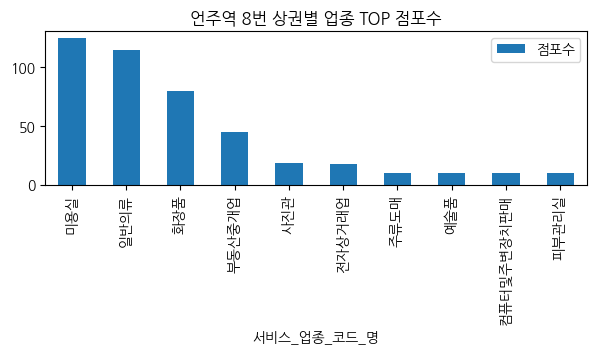

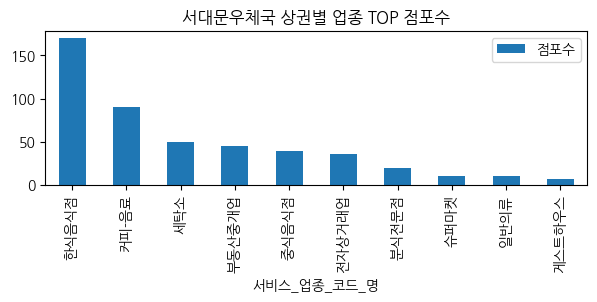

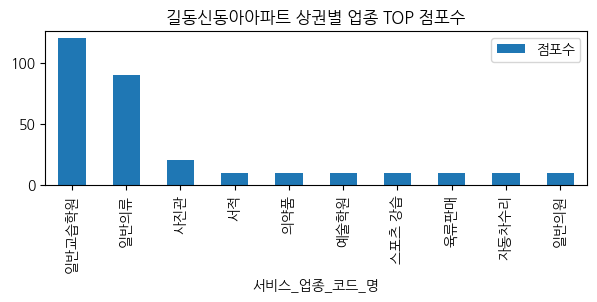

,상권_코드_명,서비스_업종_코드_명,상권구분
0,"신촌역(신촌역, 신촌로터리)",한식음식점,대학가
1,"신촌역(신촌역, 신촌로터리)",일반의류,대학가
2,"신촌역(신촌역, 신촌로터리)",호프-간이주점,대학가
3,성신여대,한식음식점,대학가
4,성신여대,호프-간이주점,대학가
5,성신여대,커피-음료,대학가
6,대학로(혜화역),한식음식점,대학가
7,대학로(혜화역),커피-음료,대학가
8,대학로(혜화역),호프-간이주점,대학가
9,청평화시장,일반의류,상업지구


In [194]:
selected_areas = campus_areas + commercial_areas + bedtown_areas
area_shop_list = []
for area_name in selected_areas:
    sub = df[df['상권_코드_명']==area_name]
    # 업종별 점포수 합산
    cat_counts = sub.groupby('서비스_업종_코드_명')['점포_수'].sum().sort_values(ascending=False)
    # 업종별 점포수 상위 3개 추출, 표와 바차트로!
    display_df = cat_counts.head(10).reset_index().rename(columns={'점포_수':'점포수'})
    display_df
    display_df.head(10).plot(x='서비스_업종_코드_명', y='점포수', kind='bar', figsize=(7,2), title=f"{area_name} 상권별 업종 TOP 점포수")
    plt.show()
    top_cats = cat_counts.head(3).index.tolist()
    area_shop_list.extend([(area_name, c) for c in top_cats])

# 최종 샘플 테이블
df_sample = pd.DataFrame(area_shop_list, columns=['상권_코드_명', '서비스_업종_코드_명'])
df_sample['상권구분'] = '기타'
df_sample.loc[df_sample['상권_코드_명'].isin(campus_areas), '상권구분'] = '대학가'
df_sample.loc[df_sample['상권_코드_명'].isin(commercial_areas), '상권구분'] = '상업지구'
df_sample.loc[df_sample['상권_코드_명'].isin(bedtown_areas), '상권구분'] = '베드타운'

df_sample


샘플 집계 (유사, 인구, 매출, 성공률 등 집계)

In [134]:
agg_cols = ['점포_수', '유사_업종_점포_수', '생존율(%)', '당월_매출_금액', '평균유동인구']
df_group = df.groupby(['상권_코드_명', '서비스_업종_코드_명'])[agg_cols].mean().reset_index()
df_result = pd.merge(df_sample, df_group, on=['상권_코드_명', '서비스_업종_코드_명'], how='left')
df_result


,상권_코드_명,서비스_업종_코드_명,상권구분,점포_수,유사_업종_점포_수,생존율(%),당월_매출_금액,평균유동인구
0,"신촌역(신촌역, 신촌로터리)",한식음식점,대학가,290.6,343.0,97.4,2.128904e+10,60412.549174
1,"신촌역(신촌역, 신촌로터리)",일반의류,대학가,208.4,209.4,97.6,2.762201e+09,60412.549174
2,"신촌역(신촌역, 신촌로터리)",호프-간이주점,대학가,171.0,193.0,96.8,7.209233e+09,60412.549174
3,성신여대,한식음식점,대학가,136.6,173.8,95.6,1.275859e+10,24288.198316
4,성신여대,호프-간이주점,대학가,74.6,95.2,96.4,4.160740e+09,24288.198316
5,성신여대,커피-음료,대학가,73.4,102.4,96.0,6.443013e+09,24288.198316
6,대학로(혜화역),한식음식점,대학가,142.4,175.4,96.2,1.457820e+10,32757.295323
7,대학로(혜화역),커피-음료,대학가,91.0,132.0,96.0,6.180456e+09,32757.295323
8,대학로(혜화역),호프-간이주점,대학가,68.6,77.2,94.4,5.526297e+09,32757.295323
9,청평화시장,일반의류,상업지구,2753.0,2757.0,97.4,1.566841e+09,20999.066139


In [135]:
df_result[['점포_수','유사_업종_점포_수','당월_매출_금액','평균유동인구']].describe()

,점포_수,유사_업종_점포_수,당월_매출_금액,평균유동인구
count,27.000000,27.000000,2.500000e+01,27.000000
mean,345.088889,355.207407,3.079758e+10,48760.771760
std,785.331991,783.465343,8.652065e+10,23028.820163
min,2.000000,3.200000,1.519987e+07,20999.066139
25%,4.900000,5.400000,1.910564e+08,32757.295323
50%,74.600000,102.400000,2.762201e+09,49688.385280
75%,156.700000,184.200000,9.439743e+09,60412.549174
max,2802.400000,2803.400000,4.041119e+11,97100.315119


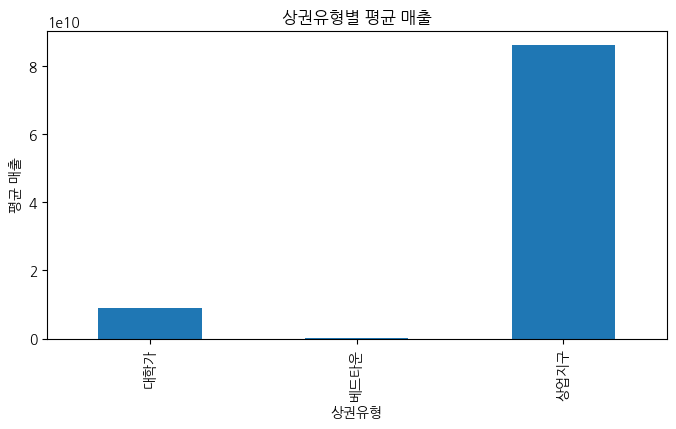

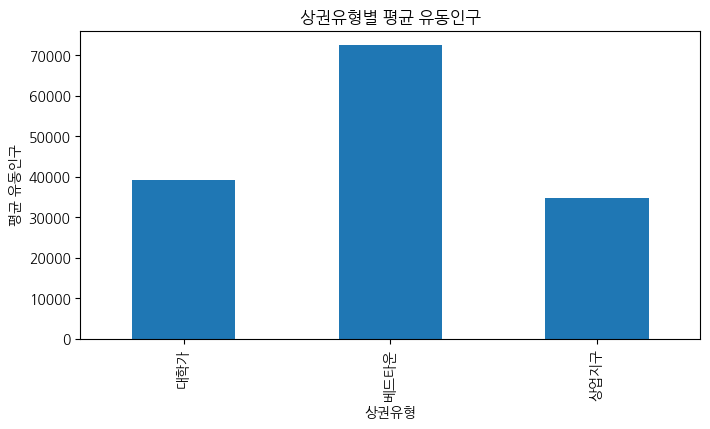

In [136]:
# 상권유형 컬럼 예시 (별도 부여)
df_result['상권유형'] = ['대학가']*9 + ['상업지구']*9 + ['베드타운']*9

# 상권유형별 평균매출 바차트
plt.figure(figsize=(8,4))
df_result.groupby('상권유형')['당월_매출_금액'].mean().plot(kind='bar')
plt.title('상권유형별 평균 매출')
plt.ylabel('평균 매출')
plt.show()

# 상권유형별 평균 유동인구 바차트
plt.figure(figsize=(8,4))
df_result.groupby('상권유형')['평균유동인구'].mean().plot(kind='bar')
plt.title('상권유형별 평균 유동인구')
plt.ylabel('평균 유동인구')
plt.show()


# 데이터 모델링, 분석 및 시각화

## 1. 인구밀도, 업종밀집도간의 상관관계 분석


[선택 가능한 상권]
1. 구로역
2. 길동신동아아파트
3. 대학로(혜화역)
4. 서대문우체국
5. 성신여대
6. 신촌역(신촌역, 신촌로터리)
7. 언주역 8번
8. 용산전자상가(용산역)
9. 청평화시장
분석할 상권명을 입력하세요 (n:종료): 신촌역(신촌역, 신촌로터리)
[해당 상권 내 업종] ['일반의류', '한식음식점', '호프-간이주점']
분석할 업종명을 입력: 일반의류


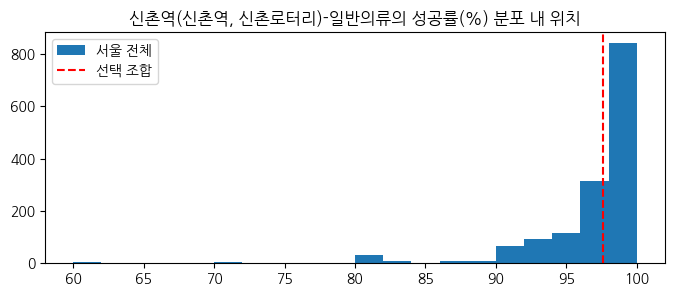

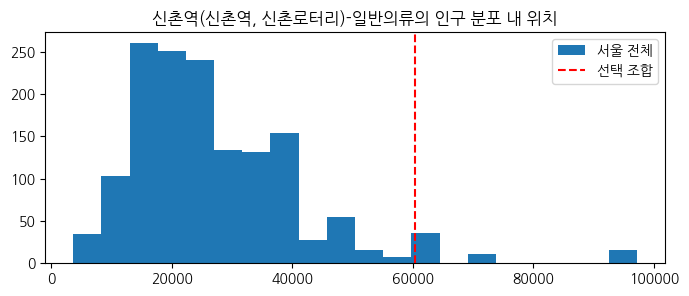

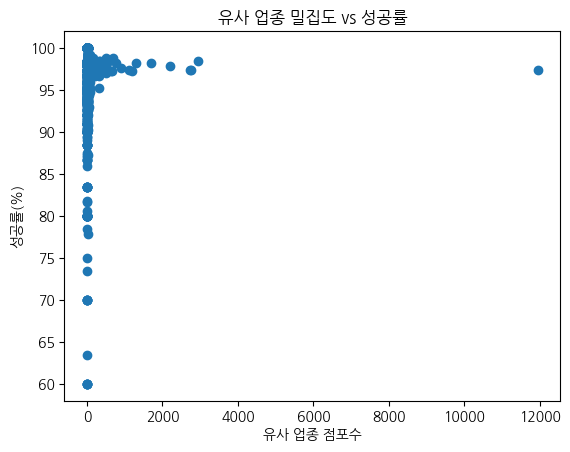

상관계수: 0.012236202482510427


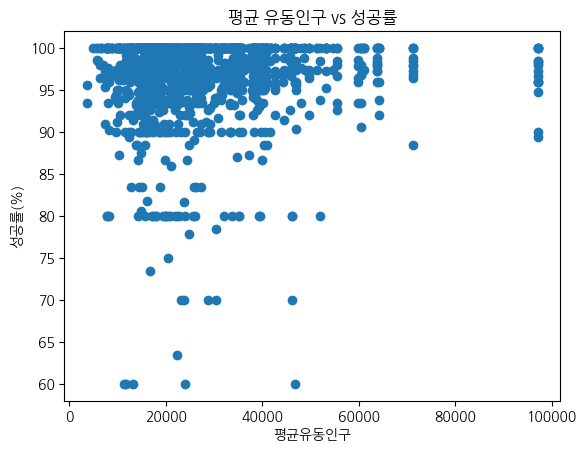

상관계수: 0.04057937912976923

[선택 가능한 상권]
1. 구로역
2. 길동신동아아파트
3. 대학로(혜화역)
4. 서대문우체국
5. 성신여대
6. 신촌역(신촌역, 신촌로터리)
7. 언주역 8번
8. 용산전자상가(용산역)
9. 청평화시장
분석할 상권명을 입력하세요 (n:종료): n


In [214]:
# 선택지 보기
df_result[['상권_코드_명','서비스_업종_코드_명']]

# 전체 집계
available_areas = sorted(df_result['상권_코드_명'].unique())
area_to_categories = {
    area: sorted(df_result[df_result['상권_코드_명'] == area]['서비스_업종_코드_명'].unique())
    for area in available_areas
}

while True:
    print("\n[선택 가능한 상권]")
    for idx, area in enumerate(available_areas, 1):
        print(f"{idx}. {area}")
    input_area = input("분석할 상권명을 입력하세요 (n:종료): ").strip()
    if input_area.lower() == 'n':
        break
    if input_area not in available_areas:
        print("잘못된 상권명."); continue
    cats = area_to_categories[input_area]
    print("[해당 상권 내 업종]", cats)
    input_category = input("분석할 업종명을 입력: ").strip()
    if input_category not in cats:
        print("잘못된 업종명."); continue

    row = df_result[(df_result['상권_코드_명']==input_area) & (df_result['서비스_업종_코드_명']==input_category)].iloc[0]
    row

    # 서울 전체 업종별 비교
    subcat = df_group[df_group['서비스_업종_코드_명']==input_category]
    plt.figure(figsize=(8,3))
    plt.hist(subcat['생존율(%)'].dropna(), bins=20, label='서울 전체')
    plt.axvline(row['생존율(%)'], color='red', linestyle='--', label='선택 조합')
    plt.title(f"{input_area}-{input_category}의 성공률(%) 분포 내 위치")
    plt.legend(); plt.show()
    plt.figure(figsize=(8,3))
    plt.hist(subcat['평균유동인구'].dropna(), bins=20, label='서울 전체')
    plt.axvline(row['평균유동인구'], color='red', linestyle='--', label='선택 조합')
    plt.title(f"{input_area}-{input_category}의 인구 분포 내 위치")
    plt.legend(); plt.show()

    # 상관분석(서울 전체)
    x = subcat['유사_업종_점포_수']
    y = subcat['생존율(%)']
    if len(x)>2:
        plt.scatter(x, y)
        plt.title("유사 업종 밀집도 vs 성공률"); plt.xlabel('유사 업종 점포수'); plt.ylabel('성공률(%)')
        plt.show()
        print("상관계수:", x.corr(y))

    x = subcat['평균유동인구']
    y = subcat['생존율(%)']
    if len(x)>2:
        plt.scatter(x, y)
        plt.title("평균 유동인구 vs 성공률"); plt.xlabel('평균유동인구'); plt.ylabel('성공률(%)')
        plt.show()
        print("상관계수:", x.corr(y))

    df_group[(df_group['상권_코드_명']==input_area) & (df_group['서비스_업종_코드_명']==input_category)]



업종별 인구밀도 및 업종밀집도와 생존율 간의 상관관계:


,서비스_업종_코드_명,유사_업종_점포_수_vs_생존율_상관계수,평균유동인구_vs_생존율_상관계수
0,가구,-0.033883,-0.002934
1,가전제품수리,-0.020845,-0.022122
2,건축물청소,-0.010403,-0.017630
3,노래방,-0.004884,0.026731
4,당구장,-0.016765,0.015369
...,...,...,...
95,기타오락장,-0.064343,-0.058491
96,고시원,-0.118754,0.047138
97,볼링장,-0.125025,0.002998
98,한복점,-0.062298,-0.164488



업종별 유사 업종 점포 수와 생존율 간의 상관관계:


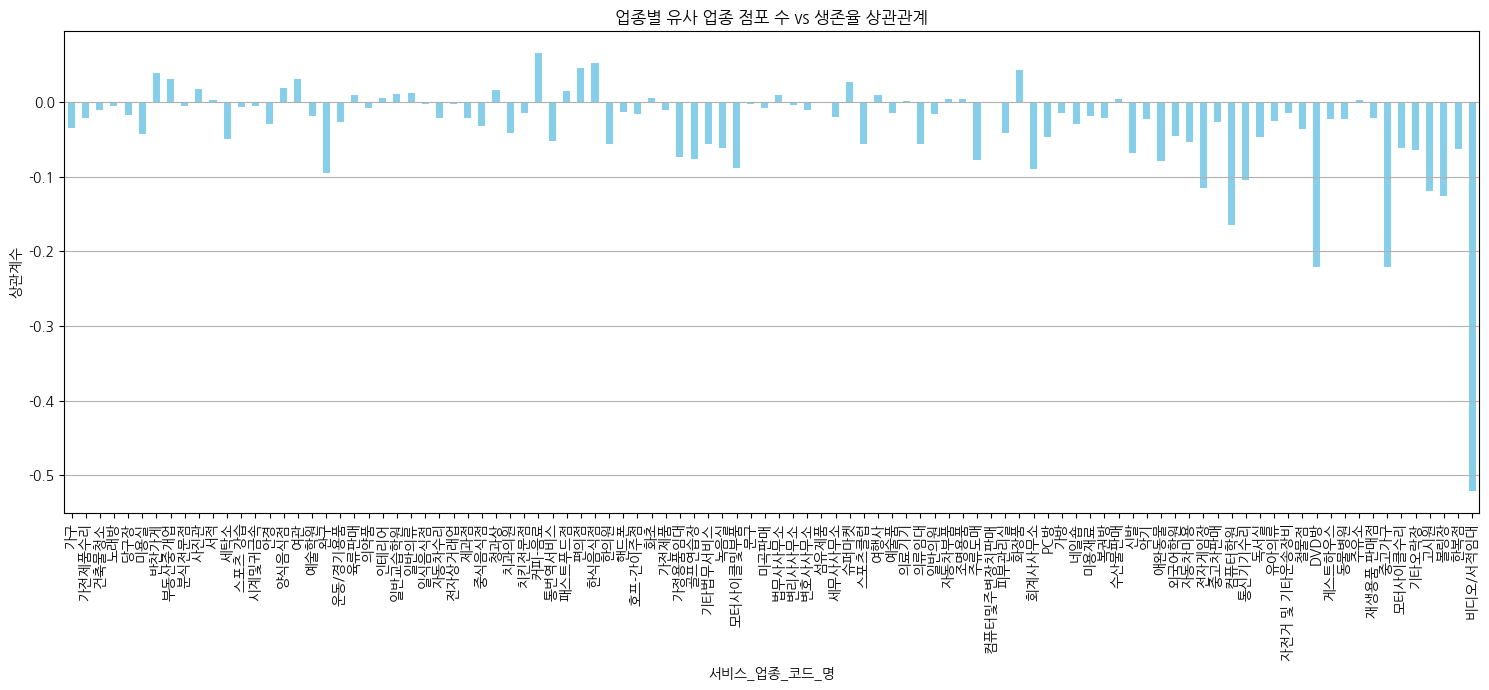


업종별 평균 유동인구와 생존율 간의 상관관계:


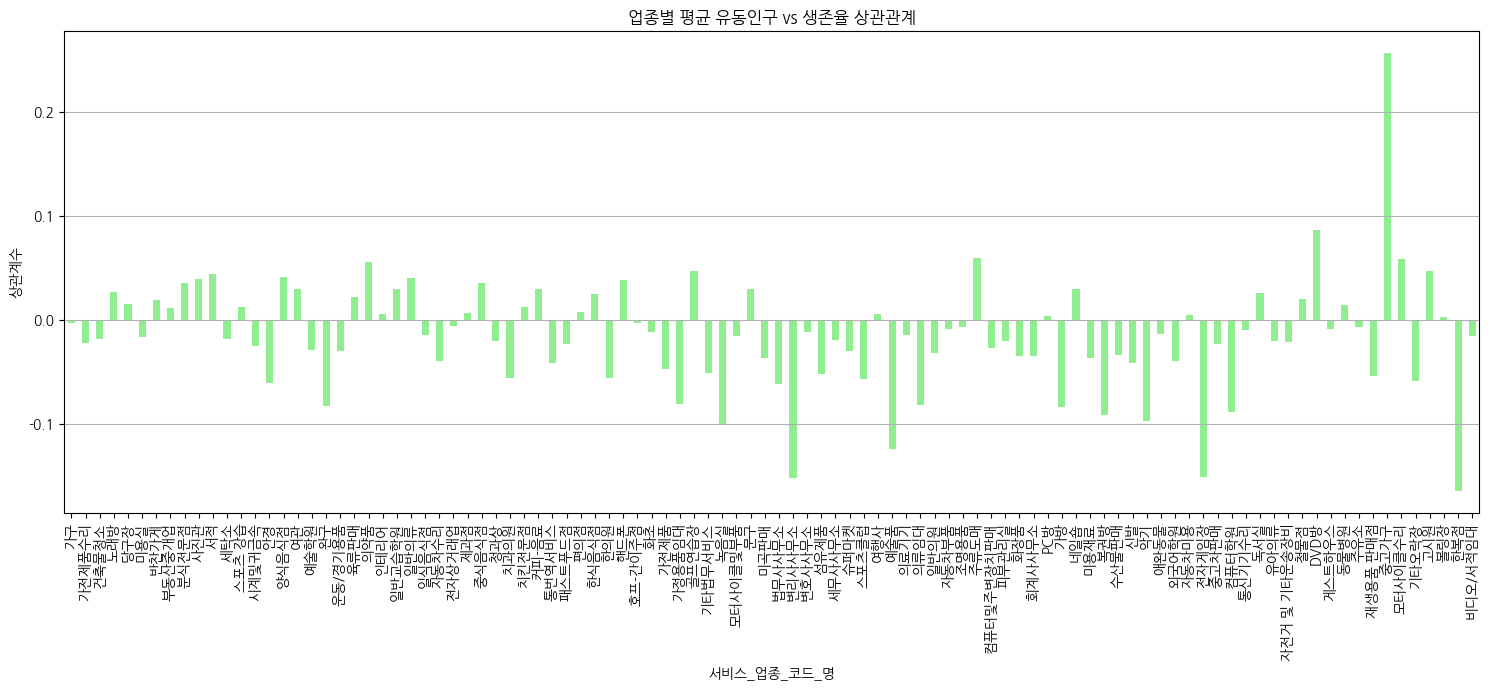

In [199]:
# 전체 상권 및 업종 조합에 대한 상관관계 분석 및 결과 저장
area_category_correlations = []

for category in df_group['서비스_업종_코드_명'].unique():
    subcat_data = df_group[df_group['서비스_업종_코드_명'] == category].copy()

    # 유사 업종 밀집도 vs 생존율 상관관계 (해당 업종 전체 상권 기준)
    if len(subcat_data) > 1 and '유사_업종_점포_수' in subcat_data.columns and '생존율(%)' in subcat_data.columns:
        corr_density_survival = subcat_data['유사_업종_점포_수'].corr(subcat_data['생존율(%)'])
    else:
        corr_density_survival = None

    # 인구 밀도 vs 생존율 상관관계 (해당 업종 전체 상권 기준)
    if len(subcat_data) > 1 and '평균유동인구' in subcat_data.columns and '생존율(%)' in subcat_data.columns:
        corr_pop_survival = subcat_data['평균유동인구'].corr(subcat_data['생존율(%)'])
    else:
        corr_pop_survival = None # 데이터 부족 등으로 계산 불가 시

    area_category_correlations.append({
        '서비스_업종_코드_명': category,
        '유사_업종_점포_수_vs_생존율_상관계수': corr_density_survival,
        '평균유동인구_vs_생존율_상관계수': corr_pop_survival
    })

# 결과를 DataFrame으로 변환
correlation_df = pd.DataFrame(area_category_correlations)

# 상관관계 결과 출력
print("\n업종별 인구밀도 및 업종밀집도와 생존율 간의 상관관계:")
display(correlation_df)

# 유사 업종 밀집도와 생존율 간의 상관관계 분석 및 시각화 (업종별)
print("\n업종별 유사 업종 점포 수와 생존율 간의 상관관계:")
plt.figure(figsize=(15, 7))
correlation_df.set_index('서비스_업종_코드_명')['유사_업종_점포_수_vs_생존율_상관계수'].plot(kind='bar', color='skyblue')
plt.title("업종별 유사 업종 점포 수 vs 생존율 상관관계")
plt.ylabel("상관계수")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 평균 유동인구와 생존율 간의 상관관계 분석 및 시각화 (업종별)
print("\n업종별 평균 유동인구와 생존율 간의 상관관계:")
plt.figure(figsize=(15, 7))
correlation_df.set_index('서비스_업종_코드_명')['평균유동인구_vs_생존율_상관계수'].plot(kind='bar', color='lightgreen')
plt.title("업종별 평균 유동인구 vs 생존율 상관관계")
plt.ylabel("상관계수")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


상권 그룹별 유사 업종 점포 수 vs 생존율 산점도:


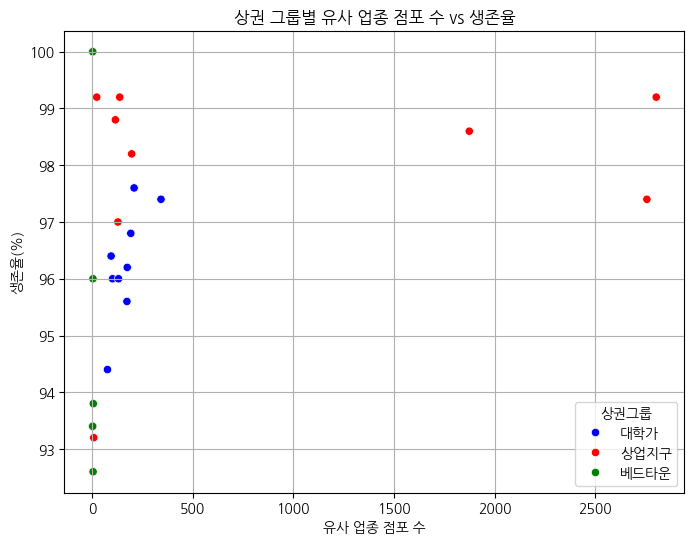


상권 그룹별 평균 유동인구 vs 생존율 산점도:


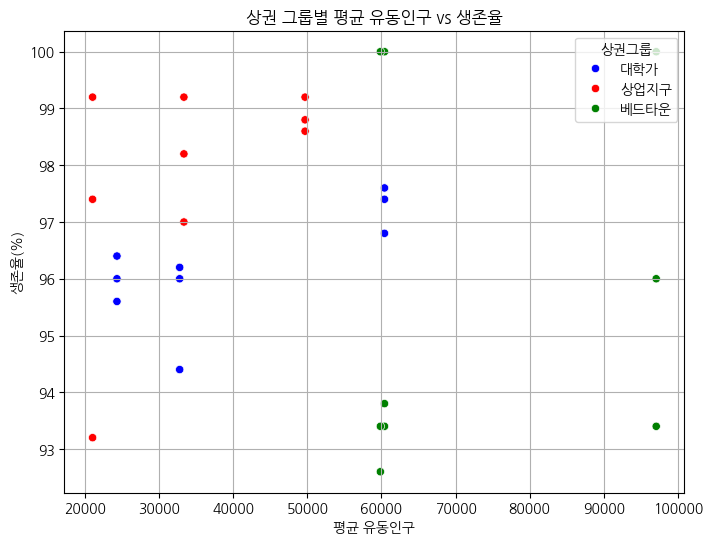

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상권 그룹별 유사 업종 점포 수 vs 생존율 산점도
print("\n상권 그룹별 유사 업종 점포 수 vs 생존율 산점도:")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_merged, x='유사_업종_점포_수', y='생존율(%)', hue='상권그룹', palette={'대학가':'blue', '상업지구':'red', '베드타운':'green', '기타':'gray'})
plt.title("상권 그룹별 유사 업종 점포 수 vs 생존율")
plt.xlabel("유사 업종 점포 수")
plt.ylabel("생존율(%)")
plt.grid(True)
plt.show()

# 상권 그룹별 평균 유동인구 vs 생존율 산점도
print("\n상권 그룹별 평균 유동인구 vs 생존율 산점도:")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_merged, x='평균유동인구', y='생존율(%)', hue='상권그룹', palette={'대학가':'blue', '상업지구':'red', '베드타운':'green', '기타':'gray'})
plt.title("상권 그룹별 평균 유동인구 vs 생존율")
plt.xlabel("평균 유동인구")
plt.ylabel("생존율(%)")
plt.grid(True)
plt.show()


상권 그룹별 유사 업종 점포 수 vs 생존율 상관계수 비교:


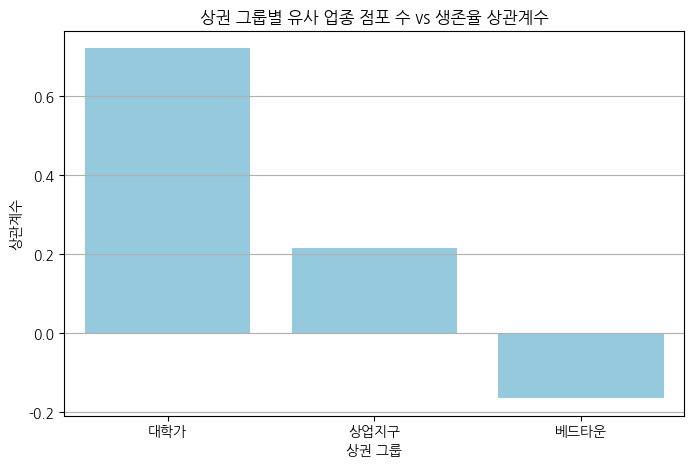


상권 그룹별 평균 유동인구 vs 생존율 상관계수 비교:


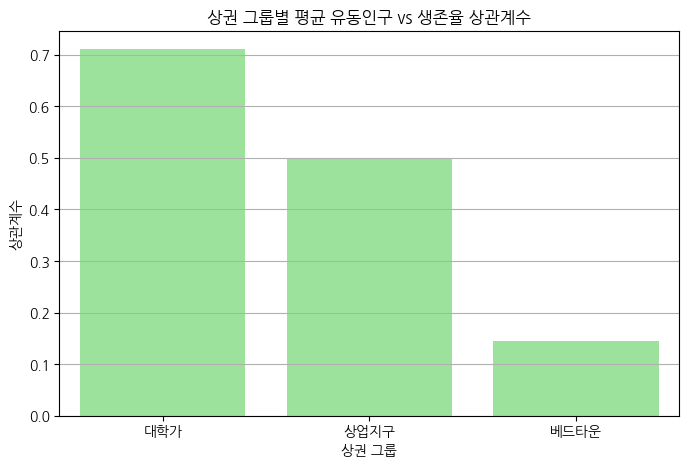

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 상권 그룹별 '유사 업종 점포 수 vs 생존율' 상관계수 바 차트
print("\n상권 그룹별 유사 업종 점포 수 vs 생존율 상관계수 비교:")
plt.figure(figsize=(8, 5))
sns.barplot(x=correlation_df_group.index, y='유사_업종_점포_수_vs_생존율', data=correlation_df_group, color='skyblue')
plt.title("상권 그룹별 유사 업종 점포 수 vs 생존율 상관계수")
plt.xlabel("상권 그룹")
plt.ylabel("상관계수")
plt.grid(axis='y')
plt.show()

# 상권 그룹별 '평균 유동인구 vs 생존율' 상관계수 바 차트
print("\n상권 그룹별 평균 유동인구 vs 생존율 상관계수 비교:")
plt.figure(figsize=(8, 5))
sns.barplot(x=correlation_df_group.index, y='평균유동인구_vs_생존율', data=correlation_df_group, color='lightgreen')
plt.title("상권 그룹별 평균 유동인구 vs 생존율 상관계수")
plt.xlabel("상권 그룹")
plt.ylabel("상관계수")
plt.grid(axis='y')
plt.show()


상권 그룹별 유사 업종 점포 수 분포:


/tmp/ipython-input-202-2725858009.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




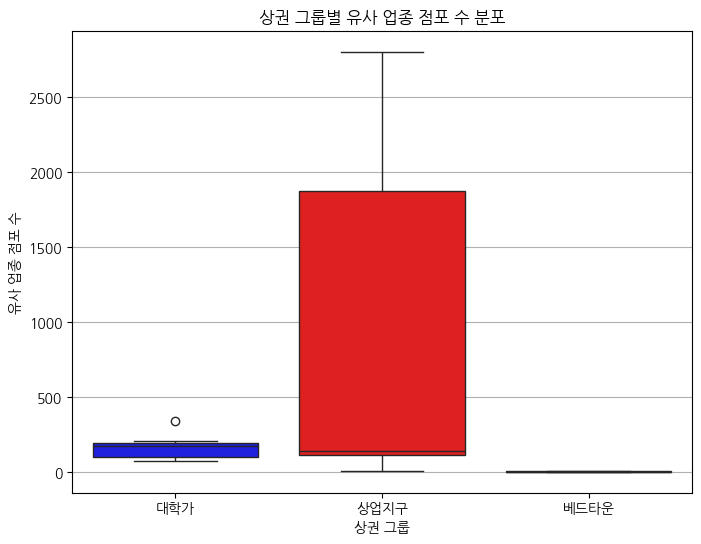


상권 그룹별 평균 유동인구 분포:


/tmp/ipython-input-202-2725858009.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




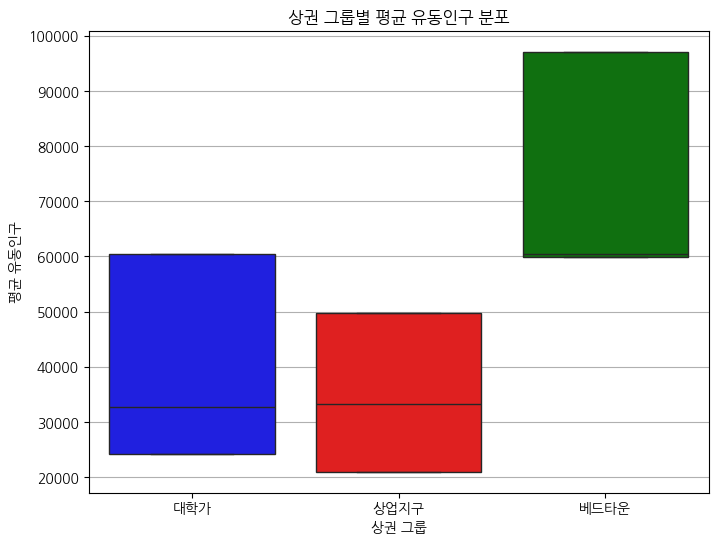

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상권 그룹별 유사 업종 점포 수 분포 비교
print("\n상권 그룹별 유사 업종 점포 수 분포:")
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_merged, x='상권그룹', y='유사_업종_점포_수', palette={'대학가':'blue', '상업지구':'red', '베드타운':'green', '기타':'gray'})
plt.title("상권 그룹별 유사 업종 점포 수 분포")
plt.xlabel("상권 그룹")
plt.ylabel("유사 업종 점포 수")
plt.grid(axis='y')
plt.show()

# 상권 그룹별 평균 유동인구 분포 비교
print("\n상권 그룹별 평균 유동인구 분포:")
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_merged, x='상권그룹', y='평균유동인구', palette={'대학가':'blue', '상업지구':'red', '베드타운':'green', '기타':'gray'})
plt.title("상권 그룹별 평균 유동인구 분포")
plt.xlabel("상권 그룹")
plt.ylabel("평균 유동인구")
plt.grid(axis='y')
plt.show()

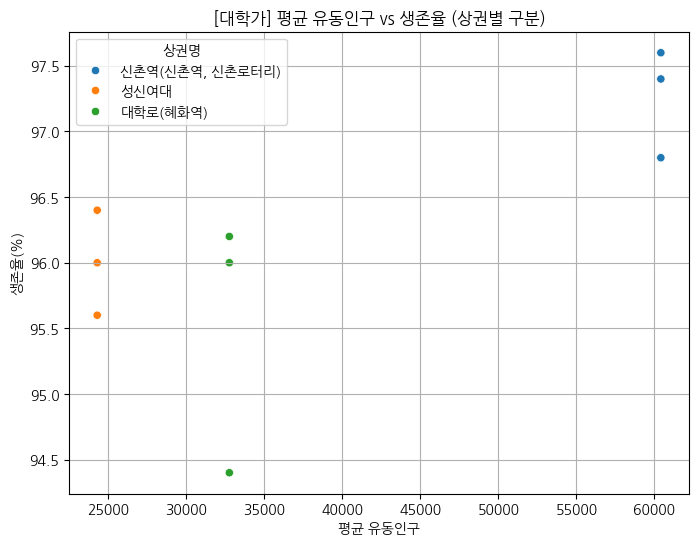

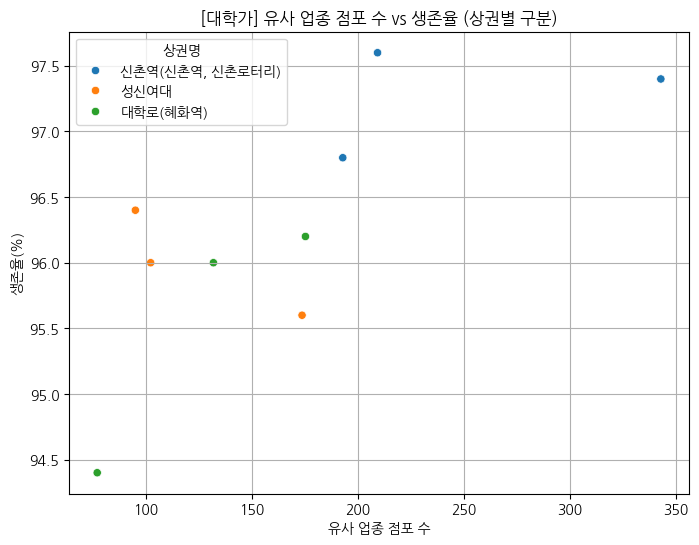

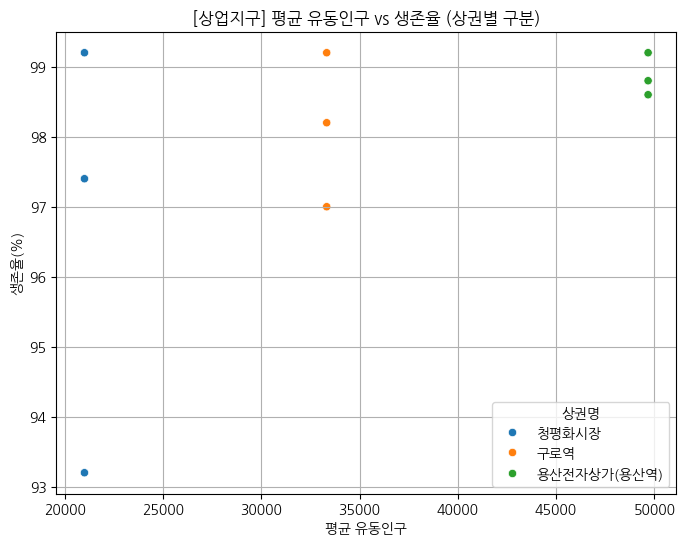

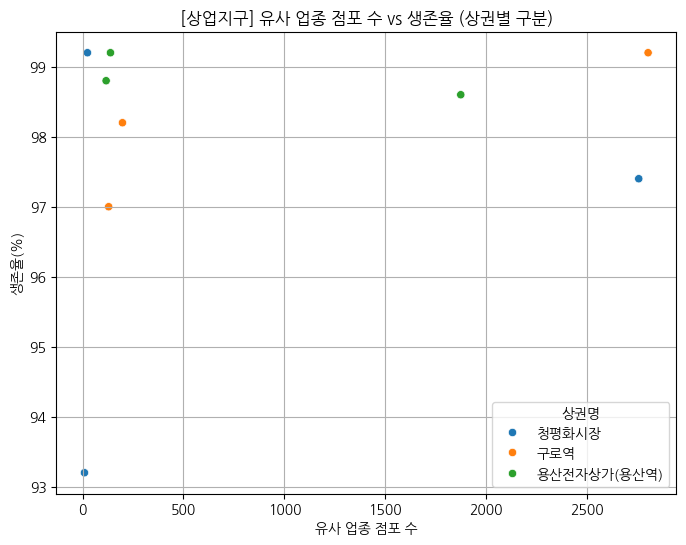

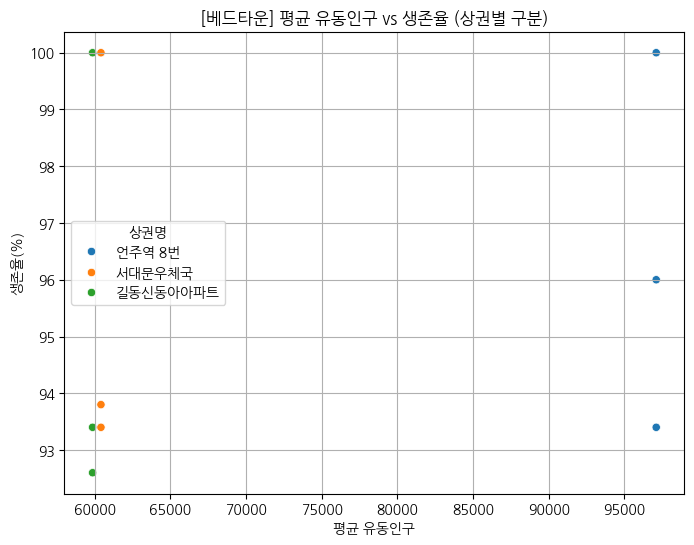

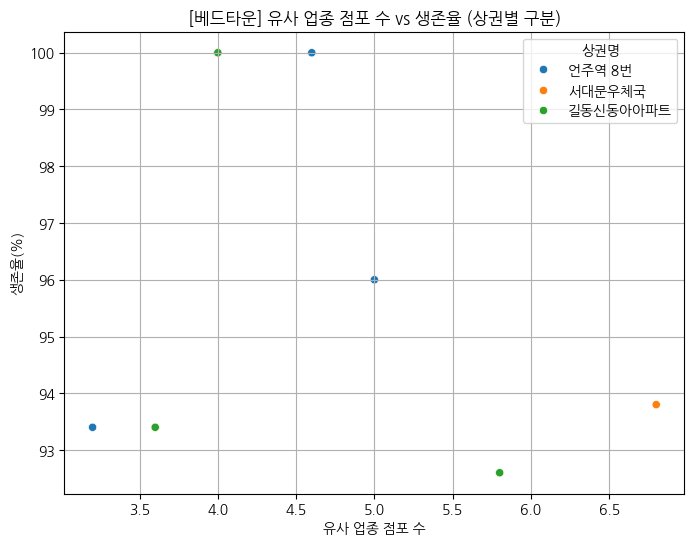

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상권 그룹과 해당 상권 목록을 매핑하는 딕셔너리
area_groups_map = {
    '대학가': campus_areas,
    '상업지구': commercial_areas,
    '베드타운': bedtown_areas
}

# 상권 그룹별 분석 및 시각화
for group_name, areas in area_groups_map.items():
    # 해당 상권 그룹에 속하는 데이터만 필터링
    group_data = df_merged[df_merged['상권_코드_명'].isin(areas)].copy()

    if not group_data.empty:
        # 그래프 1: 유동인구 vs 생존율 (상권 그룹 내 상권별 구분)
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=group_data, x='평균유동인구', y='생존율(%)', hue='상권_코드_명')
        plt.title(f"[{group_name}] 평균 유동인구 vs 생존율 (상권별 구분)")
        plt.xlabel("평균 유동인구")
        plt.ylabel("생존율(%)")
        plt.grid(True)
        plt.legend(title='상권명') # 범례 제목 추가
        plt.show()

        # 그래프 2: 유사 업종 점포 수 vs 생존율 (상권 그룹 내 상권별 구분)
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=group_data, x='유사_업종_점포_수', y='생존율(%)', hue='상권_코드_명')
        plt.title(f"[{group_name}] 유사 업종 점포 수 vs 생존율 (상권별 구분)")
        plt.xlabel("유사 업종 점포 수")
        plt.ylabel("생존율(%)")
        plt.grid(True)
        plt.legend(title='상권명') # 범례 제목 추가
        plt.show()
    else:
        print(f"{group_name} 그룹에 해당하는 데이터가 없습니다.")

In [203]:
import pandas as pd

# 결과 저장용 딕셔너리 초기화
correlation_by_group = {}

# 상권 그룹별 반복
for group in df_merged['상권그룹'].unique():
    # 해당 상권 그룹의 데이터 필터링
    group_data = df_merged[df_merged['상권그룹'] == group].copy()

    # 데이터가 충분한 경우에만 상관계수 계산 (최소 2개 이상의 데이터 포인트 필요)
    if len(group_data) > 1:
        # 유사 업종 점포 수와 생존율 간의 상관계수
        corr_density_survival = group_data['유사_업종_점포_수'].corr(group_data['생존율(%)'])

        # 평균 유동인구와 생존율 간의 상관계수
        corr_pop_survival = group_data['평균유동인구'].corr(group_data['생존율(%)'])

        correlation_by_group[group] = {
            '유사_업종_점포_수_vs_생존율': corr_density_survival,
            '평균유동인구_vs_생존율': corr_pop_survival
        }
    else:
        correlation_by_group[group] = {
            '유사_업종_점포_수_vs_생존율': None,
            '평균유동인구_vs_생존율': None
        }

# 결과를 DataFrame으로 변환하여 출력
correlation_df_group = pd.DataFrame.from_dict(correlation_by_group, orient='index')
print("\n상권 그룹별 인구밀도 및 업종밀집도와 생존율 간의 상관관계:")
display(correlation_df_group)


상권 그룹별 인구밀도 및 업종밀집도와 생존율 간의 상관관계:


,유사_업종_점포_수_vs_생존율,평균유동인구_vs_생존율
대학가,0.721217,0.710959
상업지구,0.216766,0.500181
베드타운,-0.163819,0.144300


from matplotlib import pyplot as plt
_df_0['유사_업종_점포_수_vs_생존율'].plot(kind='hist', bins=20, title='유사_업종_점포_수_vs_생존율')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['평균유동인구_vs_생존율'].plot(kind='hist', bins=20, title='평균유동인구_vs_생존율')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='유사_업종_점포_수_vs_생존율', y='평균유동인구_vs_생존율', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['유사_업종_점포_수_vs_생존율'].plot(kind='line', figsize=(8, 4), title='유사_업종_점포_수_vs_생존율')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['평균유동인구_vs_생존율'].plot(kind='line', figsize=(8, 4), title='평균유동인구_vs_생존율')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='유사_업종_점포_수_vs_생존율', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='평균유동인구_vs_생존율', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

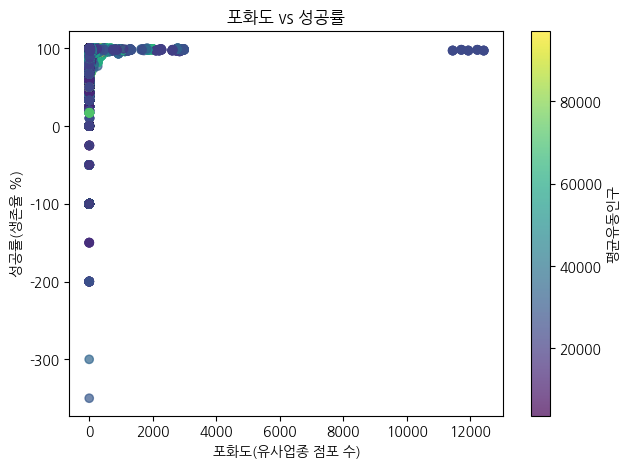

In [138]:
plt.figure(figsize=(7,5))
plt.scatter(df['유사_업종_점포_수'], df['생존율(%)'], c=df['평균유동인구'], cmap='viridis', alpha=0.7)
plt.colorbar(label='평균유동인구')
plt.xlabel('포화도(유사업종 점포 수)')
plt.ylabel('성공률(생존율 %)')
plt.title('포화도 vs 성공률')
plt.show()


## 2. 공실률 데이터간의 상관분석

In [139]:
import pandas as pd

# 데이터 로드try:
    vac = pd.read_csv('/content/drive/MyDrive/빅데이터분석(2025)/데이터/매장용빌딩공실률.csv', encoding='utf-8',
                      header =2) # header를 2로 지정하여 실제 헤더 행부터.
except UnicodeDecodeError:
    try:
        vac = pd.read_csv('/content/drive/MyDrive/빅데이터분석(2025)/데이터/매장용빌딩공실률.csv', encoding='cp949',
                          header = 2) # header를 2로 지정
    except UnicodeDecodeError:
        print("Unable to decode the file with utf-8 or cp949. Please check the file encoding.")

cols = ['지역별(1)', '지역별(2)', '공실률 (%)', '임대료 (천원/㎡)', '투자수익률', '소득수익률', '자본수익률']
vac

,지역별(1),지역별(2),소계,소계.1,투자수익률,소득수익률,자본수익률
0,서울,소계,54.9,8.9,5.52,2.47,3.00
1,도심지역,소계,86.4,12.3,5.57,2.71,2.81
2,도심지역,광화문,91.4,14.8,5.96,3.19,2.70
3,도심지역,남대문,83.2,15.0,5.36,2.58,2.73
4,도심지역,동대문,49.8,14.9,5.31,2.89,2.38
...,...,...,...,...,...,...,...
68,기타지역,장안동,37.3,8.1,4.41,2.80,1.58
69,기타지역,천호,46.8,7.4,5.71,2.82,2.83
70,기타지역,청량리,45.7,10.0,5.06,2.33,2.68
71,기타지역,혜화동,67.7,5.6,6.84,2.56,4.20


In [140]:
# 소계 컬럼 존재 여부 확인
if '소계' in vac.columns:
    print("'소계' 컬럼이 vac 데이터프레임에 존재합니다.")
else:
    print("'소계' 컬럼이 vac 데이터프레임에 존재하지 않습니다.")
if '소계.1' in vac.columns:
    print("'소계.1' 컬럼이 vac 데이터프레임에 존재합니다.")
else:
    print("'소계.1' 컬럼이 vac 데이터프레임에 존재하지 않습니다.")

# 모든 컬럼 목록 출력하여 직접 확인
print("\nvac 데이터프레임의 전체 컬럼 목록:")
print(vac.columns)

'소계' 컬럼이 vac 데이터프레임에 존재합니다.
'소계.1' 컬럼이 vac 데이터프레임에 존재합니다.

vac 데이터프레임의 전체 컬럼 목록:
Index(['지역별(1)', '지역별(2)', '소계', '소계.1', '투자수익률', '소득수익률', '자본수익률'], dtype='object')


In [141]:
# '지역별(1)' 컬럼 제거
vac_sub = vac.drop('지역별(1)', axis=1)

# 변경된 컬럼 확인
print(vac_sub.columns)

Index(['지역별(2)', '소계', '소계.1', '투자수익률', '소득수익률', '자본수익률'], dtype='object')


In [142]:
# 컬럼 이름 변경
vac_sub = vac_sub.rename(columns={

    '지역별(2)': '지역별(2)',
    '소계': '공실률 (%)',
    '소계.1': '임대료 (천원/㎡)',
    '투자수익률': '투자수익률',
    '소득수익률': '소득수익률',
    '자본수익률': '자본수익률'
})

# 변경된 컬럼 이름 확인
print(vac_sub.columns)

Index(['지역별(2)', '공실률 (%)', '임대료 (천원/㎡)', '투자수익률', '소득수익률', '자본수익률'], dtype='object')


In [143]:
vac_sub

,지역별(2),공실률 (%),임대료 (천원/㎡),투자수익률,소득수익률,자본수익률
0,소계,54.9,8.9,5.52,2.47,3.00
1,소계,86.4,12.3,5.57,2.71,2.81
2,광화문,91.4,14.8,5.96,3.19,2.70
3,남대문,83.2,15.0,5.36,2.58,2.73
4,동대문,49.8,14.9,5.31,2.89,2.38
...,...,...,...,...,...,...
68,장안동,37.3,8.1,4.41,2.80,1.58
69,천호,46.8,7.4,5.71,2.82,2.83
70,청량리,45.7,10.0,5.06,2.33,2.68
71,혜화동,67.7,5.6,6.84,2.56,4.20


In [144]:
vac_sub.isnull().sum()        # 결측치 확인
vac_sub['지역별(2)'].value_counts().head(20)  # 상권명 중복/이상치 확인

,count
지역별(2),
소계,5
광화문,1
남대문,1
동대문,1
명동,1
방산시장,1
북촌,1
서촌,1
시청,1


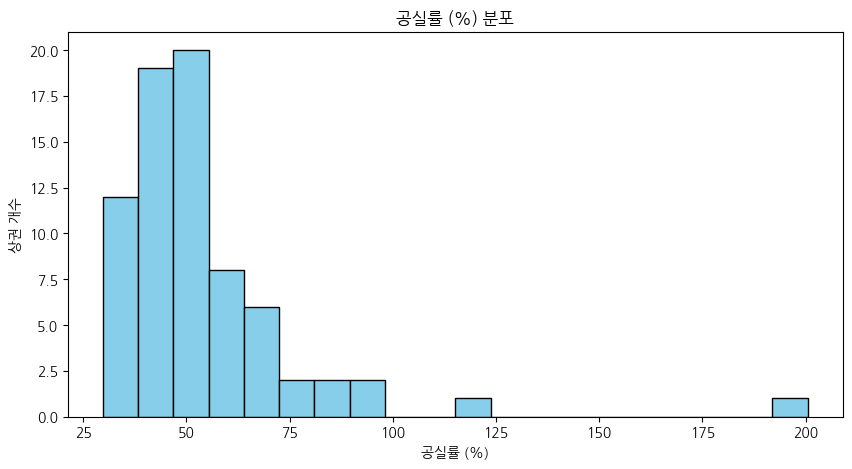

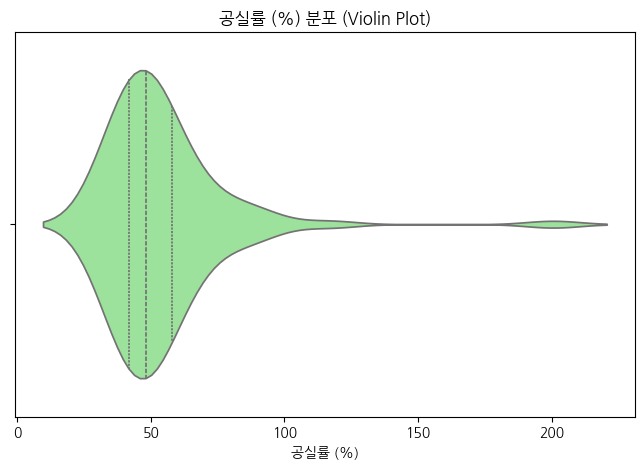

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
plt.hist(vac_sub['공실률 (%)'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('공실률 (%) 분포')
plt.xlabel('공실률 (%)')
plt.ylabel('상권 개수')
plt.show()

plt.figure(figsize=(8, 5))
sns.violinplot(x=vac_sub['공실률 (%)'].dropna(), color='lightgreen', inner='quartile')
plt.title('공실률 (%) 분포 (Violin Plot)')
plt.xlabel('공실률 (%)')
plt.show()


In [146]:
# '소계', '도심지역', '강남지역' 등 상위그룹 제거
remove_list = ['소계', '도심지역', '강남지역', '영등포신촌지역', '기타지역']
vac_sub = vac_sub[~vac_sub['지역별(2)'].isin(remove_list)]
vac_sub = vac_sub[~vac_sub['지역별(2)'].str.contains('소계')]    # 혹시 앞/뒤공백도 있을수도
vac_sub = vac_sub.drop_duplicates(subset=['지역별(2)'])

# 전처리 후 확인
vac_sub.head(10)
vac_sub.isnull().sum()


,0
지역별(2),0
공실률 (%),0
임대료 (천원/㎡),0
투자수익률,0
소득수익률,0
자본수익률,0


In [147]:
# 데이터프레임 출력
vac_sub

,지역별(2),공실률 (%),임대료 (천원/㎡),투자수익률,소득수익률,자본수익률
2,광화문,91.4,14.8,5.96,3.19,2.70
3,남대문,83.2,15.0,5.36,2.58,2.73
4,동대문,49.8,14.9,5.31,2.89,2.38
5,명동,200.5,12.2,4.98,2.11,2.82
6,방산시장,53.3,14.1,-,-,-
...,...,...,...,...,...,...
68,장안동,37.3,8.1,4.41,2.80,1.58
69,천호,46.8,7.4,5.71,2.82,2.83
70,청량리,45.7,10.0,5.06,2.33,2.68
71,혜화동,67.7,5.6,6.84,2.56,4.20


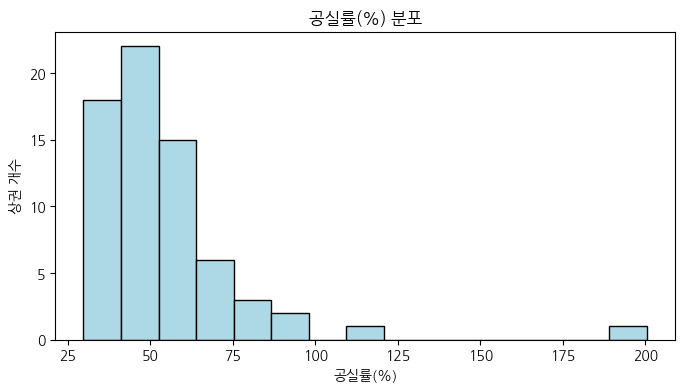

In [148]:
plt.figure(figsize=(8,4))
plt.hist(vac_sub['공실률 (%)'].dropna(), bins=15, color='lightblue', edgecolor='k')
plt.title('공실률(%) 분포')
plt.xlabel('공실률(%)')
plt.ylabel('상권 개수')
plt.show()


In [149]:
import pandas as pd
import matplotlib.pyplot as plt
from difflib import get_close_matches


In [150]:
df_result.head(10)

,상권_코드_명,서비스_업종_코드_명,상권구분,점포_수,유사_업종_점포_수,생존율(%),당월_매출_금액,평균유동인구,상권유형
0,"신촌역(신촌역, 신촌로터리)",한식음식점,대학가,290.6,343.0,97.4,2.128904e+10,60412.549174,대학가
1,"신촌역(신촌역, 신촌로터리)",일반의류,대학가,208.4,209.4,97.6,2.762201e+09,60412.549174,대학가
2,"신촌역(신촌역, 신촌로터리)",호프-간이주점,대학가,171.0,193.0,96.8,7.209233e+09,60412.549174,대학가
3,성신여대,한식음식점,대학가,136.6,173.8,95.6,1.275859e+10,24288.198316,대학가
4,성신여대,호프-간이주점,대학가,74.6,95.2,96.4,4.160740e+09,24288.198316,대학가
5,성신여대,커피-음료,대학가,73.4,102.4,96.0,6.443013e+09,24288.198316,대학가
6,대학로(혜화역),한식음식점,대학가,142.4,175.4,96.2,1.457820e+10,32757.295323,대학가
7,대학로(혜화역),커피-음료,대학가,91.0,132.0,96.0,6.180456e+09,32757.295323,대학가
8,대학로(혜화역),호프-간이주점,대학가,68.6,77.2,94.4,5.526297e+09,32757.295323,대학가
9,청평화시장,일반의류,상업지구,2753.0,2757.0,97.4,1.566841e+09,20999.066139,상업지구


In [151]:
import pandas as pd
from difflib import get_close_matches

vac_names = vac_sub['지역별(2)'].unique().tolist()

def fuzzy_match(area_name, vac_names):
    best_match = None
    max_shared_len = 0

    for vac_name in vac_names:
        for i in range(len(vac_name) - 1):
            substring = vac_name[i:i+2]
            if substring in area_name:
                 for j in range(len(substring), len(vac_name) - i + 1):
                     longer_substring = vac_name[i:i+j]
                     if longer_substring in area_name:
                         if len(longer_substring) > max_shared_len:
                             max_shared_len = len(longer_substring)
                             best_match = vac_name
                     else:
                         break
    if best_match:
        return best_match

    match = get_close_matches(area_name, vac_names, n=1, cutoff=0.7)
    return match[0] if match else None

df_result['공실률상권명'] = df_result['상권_코드_명'].apply(lambda x: fuzzy_match(x, vac_names))

areas_to_map_to_teheranro = ['언주역', '역삼']

df_result.loc[df_result['상권_코드_명'].isin(areas_to_map_to_teheranro), '공실률상권명'] = '테헤란로'

df_result['공실률상권명'] = df_result['공실률상권명'].fillna('테헤란로')

df_result[['상권_코드_명', '공실률상권명']]


,상권_코드_명,공실률상권명
0,"신촌역(신촌역, 신촌로터리)",신촌/이대
1,"신촌역(신촌역, 신촌로터리)",신촌/이대
2,"신촌역(신촌역, 신촌로터리)",신촌/이대
3,성신여대,성신여대
4,성신여대,성신여대
5,성신여대,성신여대
6,대학로(혜화역),혜화동
7,대학로(혜화역),혜화동
8,대학로(혜화역),혜화동
9,청평화시장,방산시장


In [152]:
df_merged = pd.merge(
    df_result,
    vac_sub.rename(columns={'지역별(2)': '공실률상권명', '공실률 (%)': '공실률(%)'}),
    on='공실률상권명', how='left'
)
# 결과 확인
df_merged[['상권_코드_명','공실률상권명','서비스_업종_코드_명','공실률(%)','생존율(%)','평균유동인구']].head(12)


,상권_코드_명,공실률상권명,서비스_업종_코드_명,공실률(%),생존율(%),평균유동인구
0,"신촌역(신촌역, 신촌로터리)",신촌/이대,한식음식점,57.9,97.4,60412.549174
1,"신촌역(신촌역, 신촌로터리)",신촌/이대,일반의류,57.9,97.6,60412.549174
2,"신촌역(신촌역, 신촌로터리)",신촌/이대,호프-간이주점,57.9,96.8,60412.549174
3,성신여대,성신여대,한식음식점,53.2,95.6,24288.198316
4,성신여대,성신여대,호프-간이주점,53.2,96.4,24288.198316
5,성신여대,성신여대,커피-음료,53.2,96.0,24288.198316
6,대학로(혜화역),혜화동,한식음식점,67.7,96.2,32757.295323
7,대학로(혜화역),혜화동,커피-음료,67.7,96.0,32757.295323
8,대학로(혜화역),혜화동,호프-간이주점,67.7,94.4,32757.295323
9,청평화시장,방산시장,일반의류,53.3,97.4,20999.066139


,상권_코드_명,공실률상권명,공실률(%)
0,"신촌역(신촌역, 신촌로터리)",신촌/이대,57.9
1,"신촌역(신촌역, 신촌로터리)",신촌/이대,57.9
2,"신촌역(신촌역, 신촌로터리)",신촌/이대,57.9
3,성신여대,성신여대,53.2
4,성신여대,성신여대,53.2
5,성신여대,성신여대,53.2
6,대학로(혜화역),혜화동,67.7
7,대학로(혜화역),혜화동,67.7
8,대학로(혜화역),혜화동,67.7
9,청평화시장,방산시장,53.3


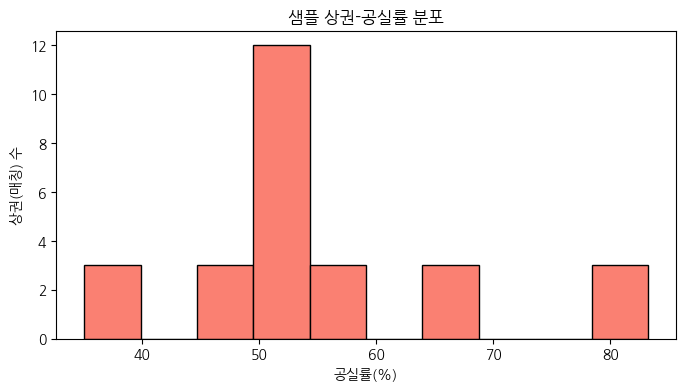

In [153]:
# 공실률 데이터 결측치 확인
display(df_merged[['상권_코드_명','공실률상권명','공실률(%)']])

# 공실률 분포
plt.figure(figsize=(8,4))
plt.hist(df_merged['공실률(%)'].dropna(), bins=10, color='salmon', edgecolor='k')
plt.xlabel('공실률(%)')
plt.ylabel('상권(매칭) 수')
plt.title('샘플 상권-공실률 분포')
plt.show()


In [154]:
# 선택 가능한 상권/업종 보기
available_areas = sorted(df_merged['상권_코드_명'].unique())
area_to_categories = {
    area: sorted(df_merged[df_merged['상권_코드_명'] == area]['서비스_업종_코드_명'].unique())
    for area in available_areas
}

while True:
    print("\n[선택 가능한 상권 목록]")
    for idx, area in enumerate(available_areas, 1):
        print(f"{idx}. {area}")
    input_area = input("\n분석할 상권명을 입력하세요 (종료:'n'): ").strip()
    if input_area.lower() == 'n':
        print("분석 종료.")
        break
    if input_area not in available_areas:
        print("잘못 입력. 다시 선택.")
        continue

    available_cats = area_to_categories[input_area]
    print(f"\n[선택 가능한 업종 목록: {input_area}]")
    for idx, cat in enumerate(available_cats, 1):
        print(f"{idx}. {cat}")
    input_category = input("분석할 업종명을 입력하세요 (종료:'n'): ").strip()
    if input_category.lower() == 'n':
        print("분석 종료.")
        break
    if input_category not in available_cats:
        print("잘못 입력. 다시 선택.")
        continue

    # 선택된 샘플 row만
    sub = df_merged[
        (df_merged['상권_코드_명'] == input_area) &
        (df_merged['서비스_업종_코드_명'] == input_category)
    ]

    sub[['상권_코드_명','서비스_업종_코드_명','생존율(%)','평균유동인구','공실률(%)']]
    # 산점도: 공실률 vs. 성공률
    plt.figure(figsize=(5,4))
    plt.scatter(sub['공실률(%)'], sub['생존율(%)'])
    plt.xlabel('공실률(%)')
    plt.ylabel('성공률(%)')
    plt.title(f"[{input_area}-{input_category}] 공실률과 성공률")
    plt.show()

    # 산점도: 공실률 vs. 인구밀도
    plt.figure(figsize=(5,4))
    plt.scatter(sub['공실률(%)'], sub['평균유동인구'])
    plt.xlabel('공실률(%)')
    plt.ylabel('평균유동인구')
    plt.title(f"[{input_area}-{input_category}] 공실률과 인구밀도")
    plt.show()

    print("---\n")



[선택 가능한 상권 목록]
1. 구로역
2. 길동신동아아파트
3. 대학로(혜화역)
4. 서대문우체국
5. 성신여대
6. 신촌역(신촌역, 신촌로터리)
7. 언주역 8번
8. 용산전자상가(용산역)
9. 청평화시장

분석할 상권명을 입력하세요 (종료:'n'): n
분석 종료.


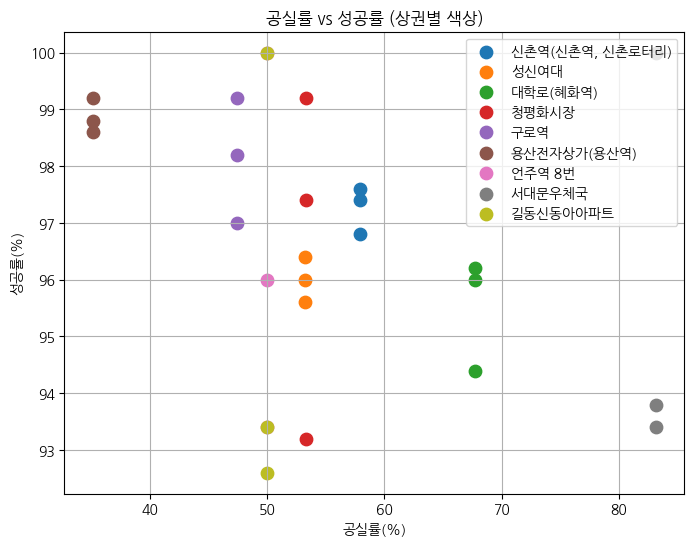

In [155]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for area in df_merged['상권_코드_명'].unique():
    subset = df_merged[df_merged['상권_코드_명'] == area]
    plt.scatter(
        subset['공실률(%)'], subset['생존율(%)'],
        label=area, s=80  # s=점크기
    )

plt.xlabel('공실률(%)')
plt.ylabel('성공률(%)')
plt.title('공실률 vs 성공률 (상권별 색상)')
plt.legend()
plt.grid(True)
plt.show()


,상권_코드_명,서비스_업종_코드_명,공실률상권명,공실률(%),생존율(%),평균유동인구,상권그룹
0,"신촌역(신촌역, 신촌로터리)",한식음식점,신촌/이대,57.9,97.4,60412.549174,대학가
1,"신촌역(신촌역, 신촌로터리)",일반의류,신촌/이대,57.9,97.6,60412.549174,대학가
2,"신촌역(신촌역, 신촌로터리)",호프-간이주점,신촌/이대,57.9,96.8,60412.549174,대학가
3,성신여대,한식음식점,성신여대,53.2,95.6,24288.198316,대학가
4,성신여대,호프-간이주점,성신여대,53.2,96.4,24288.198316,대학가
5,성신여대,커피-음료,성신여대,53.2,96.0,24288.198316,대학가
6,대학로(혜화역),한식음식점,혜화동,67.7,96.2,32757.295323,대학가
7,대학로(혜화역),커피-음료,혜화동,67.7,96.0,32757.295323,대학가
8,대학로(혜화역),호프-간이주점,혜화동,67.7,94.4,32757.295323,대학가
9,청평화시장,일반의류,방산시장,53.3,97.4,20999.066139,상업지구


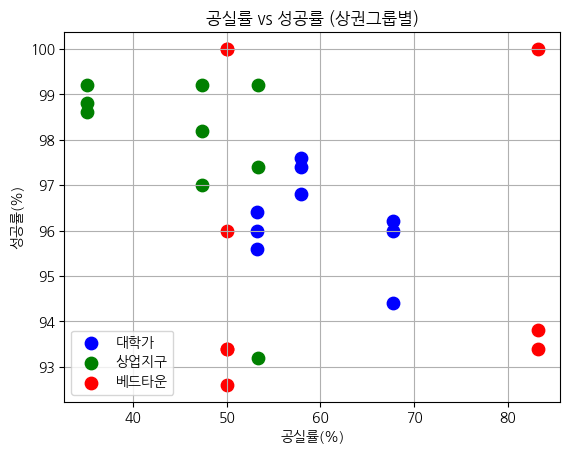

In [156]:
import matplotlib.pyplot as plt
import pandas as pd

df_merged = pd.merge(
    df_result,
    vac_sub.rename(columns={'지역별(2)': '공실률상권명', '공실률 (%)': '공실률(%)'}),
    on='공실률상권명', how='left'
)

df_merged['상권그룹'] = '기타'

df_merged.loc[df_merged['상권_코드_명'].isin(campus_areas), '상권그룹'] = '대학가'
df_merged.loc[df_merged['상권_코드_명'].isin(commercial_areas), '상권그룹'] = '상업지구'
df_merged.loc[df_merged['상권_코드_명'].isin(bedtown_areas), '상권그룹'] = '베드타운'

display(df_merged[['상권_코드_명', '서비스_업종_코드_명', '공실률상권명', '공실률(%)', '생존율(%)', '평균유동인구', '상권그룹']].head(12))

color_map = {'대학가':'blue', '상업지구':'green', '베드타운':'red'}
for group in df_merged['상권그룹'].unique():
    if group in color_map:
        subset = df_merged[df_merged['상권그룹'] == group]
        plt.scatter(
            subset['공실률(%)'], subset['생존율(%)'],
            label=group, color=color_map[group], s=80
        )

plt.xlabel('공실률(%)')
plt.ylabel('성공률(%)')
plt.title('공실률 vs 성공률 (상권그룹별)')
plt.legend()
plt.grid(True)
plt.show()

In [157]:
df_merged.columns

Index(['상권_코드_명', '서비스_업종_코드_명', '상권구분', '점포_수', '유사_업종_점포_수', '생존율(%)',
       '당월_매출_금액', '평균유동인구', '상권유형', '공실률상권명', '공실률(%)', '임대료 (천원/㎡)', '투자수익률',
       '소득수익률', '자본수익률', '상권그룹'],
      dtype='object')

In [158]:
cols_needed = ['상권_코드_명', '서비스_업종_코드_명', '점포_수', '유사_업종_점포_수',
               '생존율(%)', '평균유동인구', '공실률(%)', '당월_매출_금액', '상권구분']
df_ = df_merged[cols_needed].copy()
df_ = df_.reset_index(drop=True)
display(df_.head(10))

,상권_코드_명,서비스_업종_코드_명,점포_수,유사_업종_점포_수,생존율(%),평균유동인구,공실률(%),당월_매출_금액,상권구분
0,"신촌역(신촌역, 신촌로터리)",한식음식점,290.6,343.0,97.4,60412.549174,57.9,2.128904e+10,대학가
1,"신촌역(신촌역, 신촌로터리)",일반의류,208.4,209.4,97.6,60412.549174,57.9,2.762201e+09,대학가
2,"신촌역(신촌역, 신촌로터리)",호프-간이주점,171.0,193.0,96.8,60412.549174,57.9,7.209233e+09,대학가
3,성신여대,한식음식점,136.6,173.8,95.6,24288.198316,53.2,1.275859e+10,대학가
4,성신여대,호프-간이주점,74.6,95.2,96.4,24288.198316,53.2,4.160740e+09,대학가
5,성신여대,커피-음료,73.4,102.4,96.0,24288.198316,53.2,6.443013e+09,대학가
6,대학로(혜화역),한식음식점,142.4,175.4,96.2,32757.295323,67.7,1.457820e+10,대학가
7,대학로(혜화역),커피-음료,91.0,132.0,96.0,32757.295323,67.7,6.180456e+09,대학가
8,대학로(혜화역),호프-간이주점,68.6,77.2,94.4,32757.295323,67.7,5.526297e+09,대학가
9,청평화시장,일반의류,2753.0,2757.0,97.4,20999.066139,53.3,1.566841e+09,상업지구


## 3. 분석결과

In [159]:
# 결과 저장 리스트
corr_list = []

for i, row in df_.iterrows():
    # 밀집도(유사업종점포수)-성공률, 인구밀도-성공률, 공실률-성공률 등
    area = row['상권_코드_명']
    cat = row['서비스_업종_코드_명']

    # 그 상권-업종의 샘플 하나가 아니라, 전체 상권에서 같은 상권, 같은 업종의 값을 비교(즉, 그 조합의 전체 데이터에서 상관계수 구함)
    sub = df_merged[(df_merged['상권_코드_명']==area)&(df_merged['서비스_업종_코드_명']==cat)]
    # 실제로는 단일 row만 있으므로 전체 27조합 한 번에 비교가 맞음

# 전체 27개 샘플로 각 변수 상관계수 산출
X = df_[['점포_수','유사_업종_점포_수','생존율(%)','평균유동인구','공실률(%)','당월_매출_금액']].astype(float)

corr_matrix = X.corr()
corr_matrix   # 바로 표로 확인


,점포_수,유사_업종_점포_수,생존율(%),평균유동인구,공실률(%),당월_매출_금액
점포_수,1.000000,0.999804,0.286444,-0.268895,-0.255830,0.473743
유사_업종_점포_수,0.999804,1.000000,0.285746,-0.275842,-0.253067,0.471947
생존율(%),0.286444,0.285746,1.000000,-0.027102,-0.321439,0.348076
평균유동인구,-0.268895,-0.275842,-0.027102,1.000000,0.019979,-0.048942
공실률(%),-0.255830,-0.253067,-0.321439,0.019979,1.000000,-0.440472
당월_매출_금액,0.473743,0.471947,0.348076,-0.048942,-0.440472,1.000000


In [160]:
# 주요 상관관계(3개)만 뽑아서 보기
result = pd.DataFrame({
    '상관관계': [
        '점포_수 vs. 생존율',
        '유사_업종_점포_수 vs. 생존율',
        '평균유동인구 vs. 생존율',
        '공실률 vs. 생존율',
        '공실률 vs. 평균유동인구',
        '공실률 vs. 점포_수',
        '당월_매출_금액 vs. 생존율'
    ],
    '상관계수': [
        corr_matrix.loc['점포_수', '생존율(%)'],
        corr_matrix.loc['유사_업종_점포_수', '생존율(%)'],
        corr_matrix.loc['평균유동인구', '생존율(%)'],
        corr_matrix.loc['공실률(%)', '생존율(%)'],
        corr_matrix.loc['공실률(%)', '평균유동인구'],
        corr_matrix.loc['공실률(%)', '점포_수'],
        corr_matrix.loc['당월_매출_금액', '생존율(%)']
    ]
})
result


,상관관계,상관계수
0,점포_수 vs. 생존율,0.286444
1,유사_업종_점포_수 vs. 생존율,0.285746
2,평균유동인구 vs. 생존율,-0.027102
3,공실률 vs. 생존율,-0.321439
4,공실률 vs. 평균유동인구,0.019979
5,공실률 vs. 점포_수,-0.255830
6,당월_매출_금액 vs. 생존율,0.348076


In [217]:
import pandas as pd

group_vac_survival = df_merged.groupby('상권그룹')[['공실률(%)', '생존율(%)']].mean()

# 결과 출력
print("상권 그룹별 공실률 및 생존율 평균:")
group_vac_survival

상권 그룹별 공실률 및 생존율 평균:


,공실률(%),생존율(%)
상권그룹,,
대학가,59.600000,96.266667
베드타운,61.066667,95.844444
상업지구,45.266667,97.866667



상권 그룹별 생존율과 공실률 간의 상관관계:


,생존율_vs_공실률_상관계수
대학가,-0.360118
상업지구,-0.479366
베드타운,-0.025647



상권 그룹별 생존율 vs 공실률 상관계수 비교:


/tmp/ipython-input-218-2039358005.py:68: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




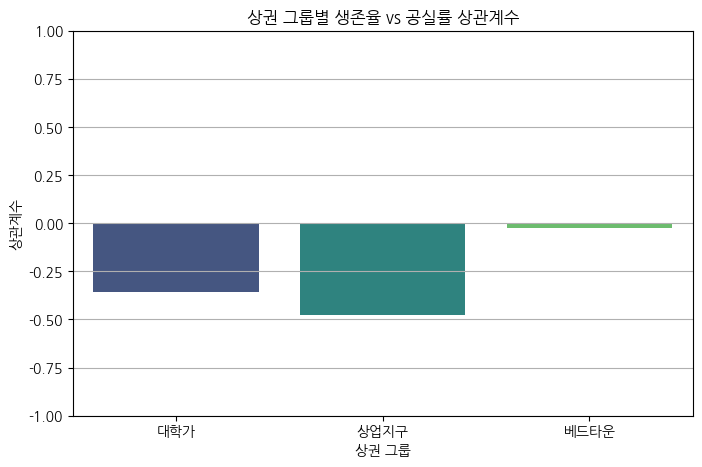


상권 그룹별 생존율 vs 공실률 산점도:


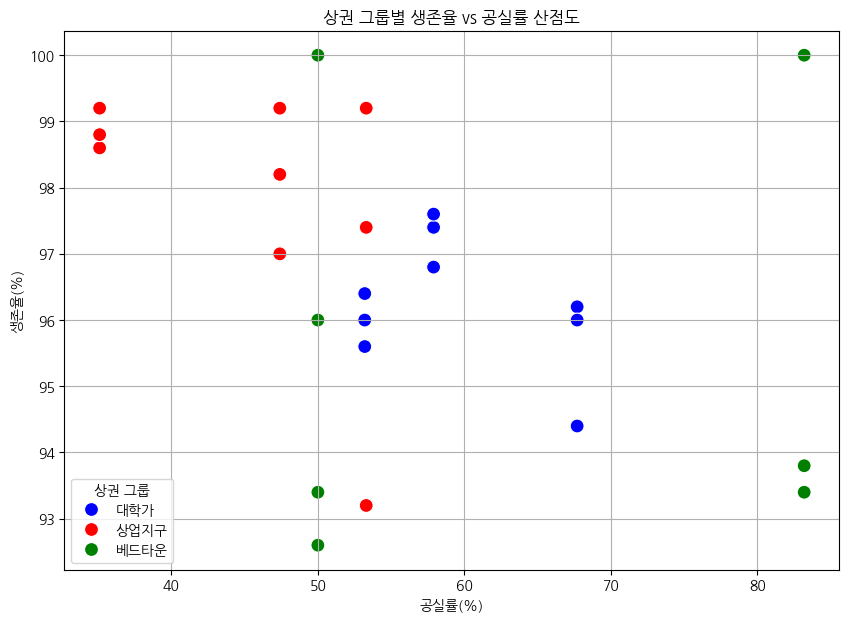

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if 'df_merged' not in locals() or '상권그룹' not in df_merged.columns:
    print("df_merged or '상권그룹' column not found, attempting to recreate.")
    try:
        df_merged = pd.merge(
            df_result,
            vac_sub.rename(columns={'지역별(2)': '공실률상권명', '공실률 (%)': '공실률(%)'}),
            on='공실률상권명', how='left'
        )

        df_merged['상권그룹'] = '기타'
        df_merged.loc[df_merged['상권_코드_명'].isin(campus_areas), '상권그룹'] = '대학가'
        df_merged.loc[df_merged['상권_코드_명'].isin(commercial_areas), '상권그룹'] = '상업지구'
        df_merged.loc[df_merged['상권_코드_명'].isin(bedtown_areas), '상권그룹'] = '베드타운'
        print("df_merged and '상권그룹' recreated.")
    except Exception as e:
        print(f"Error recreating df_merged: {e}")

# 1. 상권 그룹별 상관관계 계산
correlation_by_group_vac_survival = {}

for group in df_merged['상권그룹'].unique():
    group_data = df_merged[df_merged['상권그룹'] == group].copy()
    if len(group_data.dropna(subset=['생존율(%)', '공실률(%)'])) > 1:
        corr_vac_survival = group_data['생존율(%)'].corr(group_data['공실률(%)'])
        correlation_by_group_vac_survival[group] = corr_vac_survival
    else:
        correlation_by_group_vac_survival[group] = None # Or float('nan')

correlation_df_vac_survival = pd.DataFrame.from_dict(
    correlation_by_group_vac_survival,
    orient='index',
    columns=['생존율_vs_공실률_상관계수']
)

print("\n상권 그룹별 생존율과 공실률 간의 상관관계:")
display(correlation_df_vac_survival)

# 2. 상권 그룹별 상관계수 바 차트 시각화
print("\n상권 그룹별 생존율 vs 공실률 상관계수 비교:")
plt.figure(figsize=(8, 5))
sns.barplot(x=correlation_df_vac_survival.index, y='생존율_vs_공실률_상관계수', data=correlation_df_vac_survival, palette='viridis')
plt.title("상권 그룹별 생존율 vs 공실률 상관계수")
plt.xlabel("상권 그룹")
plt.ylabel("상관계수")
plt.grid(axis='y')
plt.ylim(-1, 1)
plt.show()

# 3. 상권 그룹별 산점도 시각화
print("\n상권 그룹별 생존율 vs 공실률 산점도:")
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_merged, x='공실률(%)', y='생존율(%)', hue='상권그룹', palette={'대학가':'blue', '상업지구':'red', '베드타운':'green', '기타':'gray'}, s=100)
plt.title("상권 그룹별 생존율 vs 공실률 산점도")
plt.xlabel("공실률(%)")
plt.ylabel("생존율(%)")
plt.grid(True)
plt.legend(title='상권 그룹')
plt.show()

In [161]:
df_result.head(5)

,상권_코드_명,서비스_업종_코드_명,상권구분,점포_수,유사_업종_점포_수,생존율(%),당월_매출_금액,평균유동인구,상권유형,공실률상권명
0,"신촌역(신촌역, 신촌로터리)",한식음식점,대학가,290.6,343.0,97.4,2.128904e+10,60412.549174,대학가,신촌/이대
1,"신촌역(신촌역, 신촌로터리)",일반의류,대학가,208.4,209.4,97.6,2.762201e+09,60412.549174,대학가,신촌/이대
2,"신촌역(신촌역, 신촌로터리)",호프-간이주점,대학가,171.0,193.0,96.8,7.209233e+09,60412.549174,대학가,신촌/이대
3,성신여대,한식음식점,대학가,136.6,173.8,95.6,1.275859e+10,24288.198316,대학가,성신여대
4,성신여대,호프-간이주점,대학가,74.6,95.2,96.4,4.160740e+09,24288.198316,대학가,성신여대


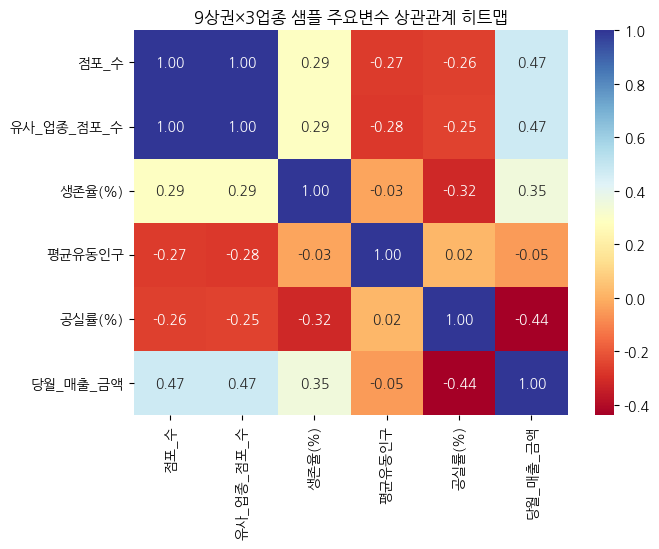

In [162]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu', fmt=".2f")
plt.title("9상권×3업종 샘플 주요변수 상관관계 히트맵")
plt.show()

## 4. 다중회귀분석

In [220]:
from sklearn.linear_model import LinearRegression

X = df_[['평균유동인구','유사_업종_점포_수','공실률(%)']].astype(float)
y = df_['생존율(%)'].astype(float)

# 결측치가 있을 경우 drop
mask = ~(X.isna().any(axis=1) | y.isna())
X_clean = X[mask]
y_clean = y[mask]

# 모델 학습
reg = LinearRegression().fit(X_clean, y_clean)

print("회귀식(생존율 = β0 + β1*인구밀도 + β2*업종밀집도 + β3*공실률)")
print("절편(β0):", reg.intercept_)
print("계수(β1~β3):", reg.coef_)

# 계수(β1, β2, β3)는 각 변수가 생존율(%)에 미치는 영향
result_coef = pd.DataFrame({
    '설명변수':['평균유동인구','유사_업종_점포_수','공실률(%)'],
    '계수':reg.coef_
})
result_coef

회귀식(생존율 = β0 + β1*인구밀도 + β2*업종밀집도 + β3*공실률)
절편(β0): 98.82462404740026
계수(β1~β3): [ 4.23593944e-06  6.87410747e-04 -4.72976550e-02]


,설명변수,계수
0,평균유동인구,0.000004
1,유사_업종_점포_수,0.000687
2,공실률(%),-0.047298


In [164]:
# 예측 생존율(%) 계산
y_pred = reg.predict(X_clean)
df_predict = df_[mask].copy()
df_predict['예측_생존율(%)'] = y_pred
df_predict[['상권_코드_명','서비스_업종_코드_명','생존율(%)','예측_생존율(%)']]

,상권_코드_명,서비스_업종_코드_명,생존율(%),예측_생존율(%)
0,"신촌역(신촌역, 신촌로터리)",한식음식점,97.4,96.577776
1,"신촌역(신촌역, 신촌로터리)",일반의류,97.6,96.485938
2,"신촌역(신촌역, 신촌로터리)",호프-간이주점,96.8,96.474664
3,성신여대,한식음식점,95.6,96.530744
4,성신여대,호프-간이주점,96.4,96.476714
5,성신여대,커피-음료,96.0,96.481663
6,대학로(혜화역),한식음식점,96.2,95.881903
7,대학로(혜화역),커피-음료,96.0,95.852069
8,대학로(혜화역),호프-간이주점,94.4,95.814399
9,청평화시장,일반의류,97.4,98.287801


--- 회귀 분석 결과: 독립 변수별 계수 ---


,설명변수,계수
0,평균유동인구,0.000004
1,유사_업종_점포_수,0.000687
2,공실률(%),-0.047298




--- 실제 생존율 vs 예측 생존율 (일부 샘플) ---


,상권_코드_명,서비스_업종_코드_명,생존율(%),예측_생존율(%)
0,"신촌역(신촌역, 신촌로터리)",한식음식점,97.4,96.577776
1,"신촌역(신촌역, 신촌로터리)",일반의류,97.6,96.485938
2,"신촌역(신촌역, 신촌로터리)",호프-간이주점,96.8,96.474664
3,성신여대,한식음식점,95.6,96.530744
4,성신여대,호프-간이주점,96.4,96.476714
5,성신여대,커피-음료,96.0,96.481663
6,대학로(혜화역),한식음식점,96.2,95.881903
7,대학로(혜화역),커피-음료,96.0,95.852069
8,대학로(혜화역),호프-간이주점,94.4,95.814399
9,청평화시장,일반의류,97.4,98.287801




--- 실제 생존율 vs 예측 생존율 산점도 (PPT 활용) ---


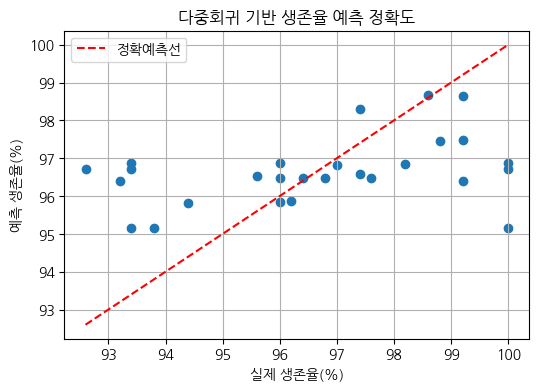

In [222]:
result_coef = pd.DataFrame({
    '설명변수': ['평균유동인구', '유사_업종_점포_수', '공실률(%)'],
    '계수': reg.coef_
})

print("--- 회귀 분석 결과: 독립 변수별 계수 ---")
display(result_coef)
print("\n") # 구분을 위해 줄 바꿈 추가

# 예측 생존율(%) 계산 및 실제값과 비교하여 출력 (일부 샘플)
print("--- 실제 생존율 vs 예측 생존율 (일부 샘플) ---")
display(df_predict[['상권_코드_명', '서비스_업종_코드_명', '생존율(%)', '예측_생존율(%)']].head(10)) # 상위 10개 예시 출력
print("\n")


import matplotlib.pyplot as plt

print("--- 실제 생존율 vs 예측 생존율 산점도 (PPT 활용) ---")
plt.figure(figsize=(6, 4))
plt.scatter(df_predict['생존율(%)'], df_predict['예측_생존율(%)'])
plt.xlabel('실제 생존율(%)')
plt.ylabel('예측 생존율(%)')
plt.title('다중회귀 기반 생존율 예측 정확도')
plt.grid(True)
plt.plot([df_predict['생존율(%)'].min(), df_predict['생존율(%)'].max()],
         [df_predict['생존율(%)'].min(), df_predict['생존율(%)'].max()],
         color='red', linestyle='--', label='정확예측선')
plt.legend()
plt.show()
print("\n")

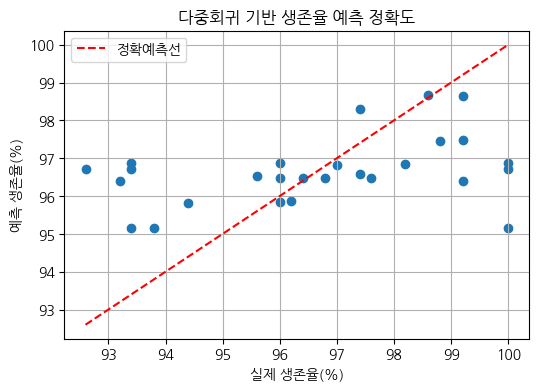

In [165]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(df_predict['생존율(%)'], df_predict['예측_생존율(%)'])
plt.xlabel('실제 생존율(%)')
plt.ylabel('예측 생존율(%)')
plt.title('다중회귀 기반 생존율 예측 정확도')
plt.grid(True)
plt.plot([df_predict['생존율(%)'].min(), df_predict['생존율(%)'].max()],
         [df_predict['생존율(%)'].min(), df_predict['생존율(%)'].max()],
         color='red', linestyle='--', label='정확예측선')
plt.legend()
plt.show()


## 5. 복합 영향 분석 지도 시각화

In [166]:
# 분석 결과에 좌표 붙이기
map_df = pd.merge(df_, coords, on=['상권_코드_명'], how='left')

# 좌표 결측값 확인
print(map_df[['상권_코드_명', '엑스좌표_값', '와이좌표_값']].isna().sum())

상권_코드_명    0
엑스좌표_값     0
와이좌표_값     0
dtype: int64


In [167]:
map_df.head(5)

,상권_코드_명,서비스_업종_코드_명,점포_수,유사_업종_점포_수,생존율(%),평균유동인구,공실률(%),당월_매출_금액,상권구분,상권_코드,엑스좌표_값,와이좌표_값
0,"신촌역(신촌역, 신촌로터리)",한식음식점,290.6,343.0,97.4,60412.549174,57.9,2.128904e+10,대학가,3120094,194382,450780
1,"신촌역(신촌역, 신촌로터리)",일반의류,208.4,209.4,97.6,60412.549174,57.9,2.762201e+09,대학가,3120094,194382,450780
2,"신촌역(신촌역, 신촌로터리)",호프-간이주점,171.0,193.0,96.8,60412.549174,57.9,7.209233e+09,대학가,3120094,194382,450780
3,성신여대,한식음식점,136.6,173.8,95.6,24288.198316,53.2,1.275859e+10,대학가,3120072,201545,454756
4,성신여대,호프-간이주점,74.6,95.2,96.4,24288.198316,53.2,4.160740e+09,대학가,3120072,201545,454756


In [168]:
!pip install pyproj

In [169]:
from pyproj import Transformer

# 서울시 TM (EPSG:2097, 5178) → WGS84 (EPSG:4326)
# 대부분 EPSG:5178 (Korea 2000 / Central Belt TM)이 많이 쓰임
transformer = Transformer.from_crs("epsg:2097", "epsg:4326", always_xy=True)

def tm_to_wgs84(x, y):
    lon, lat = transformer.transform(x, y)
    return lon, lat

# DataFrame에서 변환
map_df['경도'], map_df['위도'] = zip(*map_df.apply(lambda row: tm_to_wgs84(row['엑스좌표_값'], row['와이좌표_값']), axis=1))


In [171]:
df_.columns

Index(['상권_코드_명', '서비스_업종_코드_명', '점포_수', '유사_업종_점포_수', '생존율(%)', '평균유동인구',
       '공실률(%)', '당월_매출_금액', '상권구분'],
      dtype='object')

In [172]:
# 예시: 위도·경도 기준으로 서울지역 여부 판별 (간단 범위)
map_df['is_seoul'] = (
    (map_df['위도'] >= 37.4) & (map_df['위도'] <= 37.7) &
    (map_df['경도'] >= 126.7) & (map_df['경도'] <= 127.2)
)


In [182]:
map_df.columns

Index(['상권_코드_명', '서비스_업종_코드_명', '점포_수', '유사_업종_점포_수', '생존율(%)', '평균유동인구',
       '공실률(%)', '당월_매출_금액', '상권구분', '상권_코드', '엑스좌표_값', '와이좌표_값', '경도', '위도',
       'is_seoul', '상권구분컬러'],
      dtype='object')

In [174]:
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

In [195]:
map_df_clean_vac = map_df.dropna(subset=['위도', '경도', '공실률(%)']).copy()

fig = px.scatter_mapbox(
    map_df_clean_vac, # 공실률 NaN 제거된 DataFrame 사용
    lat='위도',
    lon='경도',
    color='공실률(%)',  # 공실률을 색상으로 사용
    size='공실률(%)',   # 공실률을 원 크기로 반영 (또는 다른 변수 사용)
    size_max=20, # 마커의 최대 크기
    hover_name='상권_코드_명',
    hover_data=['상권그룹', '서비스_업종_코드_명', '예측_생존율(%)', '평균유동인구', '공실률(%)', '당월_매출_금액'], # 필요한 정보 추가
    color_continuous_scale='Plasma', # 공실률에는 반전된 컬러맵 (높을수록 빨강 등)이 좋을 수 있습니다. 'Plasma', 'Inferno', 'Reds' 등
    range_color=[0, map_df_clean_vac['공실률(%)'].max()], # 공실률 범위에 맞게 조정
    mapbox_style='carto-positron',
    zoom=11,
    center={'lat': 37.5665, 'lon': 126.9780},
    height=650
)

fig.update_layout(
    title='서울시 공실률 지도 (색상: 공실률)',
    coloraxis_colorbar=dict(title='공실률(%)'),
    margin=dict(r=0, l=0, t=40, b=0),
    hovermode='closest'
)

fig.show()

In [187]:
import plotly.express as px
import pandas as pd
import folium # folium이 이 셀에서 사용되지 않더라도 import되어 있는지 확인합니다.
from pyproj import Transformer # pyproj 임포트 추가

map_df = pd.merge(df_predict, coords[['상권_코드_명', '엑스좌표_값', '와이좌표_값']],
              on='상권_코드_명', how='left')

transformer = Transformer.from_crs("epsg:2097", "epsg:4326", always_xy=True)

def tm_to_wgs84(x, y):
    # 결측값 처리: x 또는 y가 NaN이면 None, None 반환
    if pd.isna(x) or pd.isna(y):
        return None, None
    lon, lat = transformer.transform(x, y)
    return lon, lat

# map_df에 새로운 '경도', '위도' 컬럼 추가
map_df['경도'], map_df['위도'] = zip(*map_df.apply(
    lambda row: tm_to_wgs84(row['엑스좌표_값'], row['와이좌표_값']), axis=1
))


map_df['상권그룹'] = '기타' # 기본값으로 초기화
map_df.loc[map_df['상권_코드_명'].isin(campus_areas), '상권그룹'] = '대학가'
map_df.loc[map_df['상권_코드_명'].isin(commercial_areas), '상권그룹'] = '상업지구'
map_df.loc[map_df['상권_코드_명'].isin(bedtown_areas), '상권그룹'] = '베드타운'

color_map = {
    '대학가': 'blue',
    '상업지구': 'red',
    '베드타운': 'green',
    '기타': 'gray'
}

map_df['상권구분컬러'] = map_df['상권그룹'].map(color_map).fillna('gray')

map_df_clean = map_df.dropna(subset=['위도', '경도', '예측_생존율(%)']).copy()


fig = px.scatter_mapbox(
    map_df_clean, # 결측치 제거된 DataFrame 사용
    lat='위도',
    lon='경도',
    color='예측_생존율(%)',
    size='예측_생존율(%)',
    size_max=20, # 마커의 최대 크기
    hover_name='상권_코드_명',
    hover_data=['상권그룹', '서비스_업종_코드_명', '예측_생존율(%)', '평균유동인구', '공실률(%)'], # 호버 정보에 추가할 컬럼들
    color_continuous_scale='Viridis',
    range_color=[0, 100],
    mapbox_style='carto-positron',
    zoom=11, # 초기 확대 레벨
    center={'lat': 37.5665, 'lon': 126.9780}, # 초기 지도 중심 좌표 (서울)
    height=650 # 지도 높이
)

fig.update_layout(
    title='서울시 예측 생존율 지도 (색상: 예측 생존율)', # 지도 제목 수정
    coloraxis_colorbar=dict(title='예측 생존율(%)'), # 컬러바 제목
    margin=dict(r=0, l=0, t=40, b=0), # 여백 설정
    hovermode='closest'
)

fig.show()

In [176]:
import folium
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import Normalize, to_hex

cmap = plt.cm.YlOrRd  # plasma, viridis, YlOrRd, YlGn 등 가능
norm = Normalize(vmin=map_df['생존율(%)'].min(), vmax=map_df['생존율(%)'].max())

area_type_dict = {
    "대학가": "blue",
    "상업지구": "red",
    "베드타운": "green"
}

def is_in_seoul(lat, lon):
    return (37.3 < lat < 37.7) and (126.7 < lon < 127.2)

m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

for idx, row in map_df.iterrows():
    lat, lon = row['위도'], row['경도']
    pred = row['생존율(%)']
    area_type = row.get('상권구분', '기타')
    border_color = area_type_dict.get(area_type, "gray")  # 상권 구분별 외곽선 색

    if is_in_seoul(lat, lon):
        color = to_hex(cmap(norm(pred)))
    else:
        color = "black"

    folium.Circle(
        location=[lat, lon],
        radius=400,  # 점 크기 조정
        color=border_color,
        weight=2 if is_in_seoul(lat, lon) else 1,  # 서울이면 두껍게
        fill=True,
        fill_color=color,
        fill_opacity=0.8,
        popup=f"{row['상권_코드_명']}<br>{area_type}<br>예측생존율: {pred:.1f}%"
    ).add_to(m)

from branca.colormap import LinearColormap

linear_cmap = LinearColormap(
    [to_hex(cmap(x)) for x in [0, 0.5, 1]],
    vmin=map_df['생존율(%)'].min(),
    vmax=map_df['생존율(%)'].max(),
    caption='예측 생존율(%)'
)
linear_cmap.add_to(m)

# 결과 저장
m.save('/content/map_survival_pred_custom.html')

In [177]:
import json

with open('/content/drive/MyDrive/빅데이터분석(2025)/데이터/hangjeongdong_서울특별시.geojson', encoding='utf-8') as f:
    seoul_geo = json.load(f)

# 첫 번째 feature 속성 살펴보기
seoul_geo['features'][0]['properties']

{'OBJECTID': 1,
 'adm_nm': '서울특별시 종로구 사직동',
 'adm_cd': '1101053',
 'adm_cd2': '1111053000',
 'sgg': '11110',
 'sido': '11',
 'sidonm': '서울특별시',
 'sggnm': '종로구'}